In [89]:
%matplotlib inline
%pprint
import nltk
import numpy
import matplotlib
import matplotlib.pyplot as plt

from nltk.corpus import udhr, stopwords, re, swadesh
from nltk.corpus import BracketParseCorpusReader
from nltk.corpus import wordnet as wn

from __future__ import division

Pretty printing has been turned OFF


In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


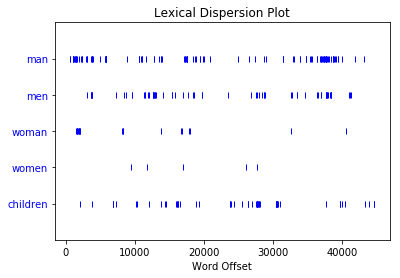

In [3]:
# Dispersion plot

text3.dispersion_plot(["man", "men", "woman", "women", "children"])

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']

In [5]:
# To avoid typing all this out you can "from nltk.corpus import gutenberg", then you can just call gutenberg.words

emma = nltk.corpus.gutenberg.words("austen-emma.txt")
len(emma)

192427

In [6]:
for file in gutenberg.fileids():
    num_chars = len(gutenberg.raw(file))
    num_words = len(gutenberg.words(file))
    num_sents = len(gutenberg.sents(file))
    num_vocab = len(set(w.lower() for w in gutenberg.words(file)))
    print(round(num_chars / num_words), round(num_words / num_sents))

5 25
5 26
5 28
4 34
5 19
4 19
4 18
4 20
5 20
5 23
5 18
4 21
5 26
5 52
4 12
4 12
4 12
5 36


In [7]:
macbeth_sentences = gutenberg.sents("shakespeare-macbeth.txt")
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [8]:
macbeth_sentences[1058]

['Come', ',', 'wee', "'", 'l', 'to', 'sleepe', ':', 'My', 'strange', '&', 'self', '-', 'abuse', 'Is', 'the', 'initiate', 'feare', ',', 'that', 'wants', 'hard', 'vse', ':', 'We', 'are', 'yet', 'but', 'yong', 'indeed', '.']

In [9]:
longest_sent = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_sent]

[['Doubtfull', 'it', 'stood', ',', 'As', 'two', 'spent', 'Swimmers', ',', 'that', 'doe', 'cling', 'together', ',', 'And', 'choake', 'their', 'Art', ':', 'The', 'mercilesse', 'Macdonwald', '(', 'Worthie', 'to', 'be', 'a', 'Rebell', ',', 'for', 'to', 'that', 'The', 'multiplying', 'Villanies', 'of', 'Nature', 'Doe', 'swarme', 'vpon', 'him', ')', 'from', 'the', 'Westerne', 'Isles', 'Of', 'Kernes', 'and', 'Gallowgrosses', 'is', 'supply', "'", 'd', ',', 'And', 'Fortune', 'on', 'his', 'damned', 'Quarry', 'smiling', ',', 'Shew', "'", 'd', 'like', 'a', 'Rebells', 'Whore', ':', 'but', 'all', "'", 's', 'too', 'weake', ':', 'For', 'braue', 'Macbeth', '(', 'well', 'hee', 'deserues', 'that', 'Name', ')', 'Disdayning', 'Fortune', ',', 'with', 'his', 'brandisht', 'Steele', ',', 'Which', 'smoak', "'", 'd', 'with', 'bloody', 'execution', '(', 'Like', 'Valours', 'Minion', ')', 'caru', "'", 'd', 'out', 'his', 'passage', ',', 'Till', 'hee', 'fac', "'", 'd', 'the', 'Slaue', ':', 'Which', 'neu', "'", 'r', 's

In [10]:
from nltk.corpus import webtext

# First 20 characters of file
for file in webtext.fileids():
    print(file, webtext.raw(file)[:30], "...")

firefox.txt Cookie Manager: "Don't allow s ...
grail.txt SCENE 1: [wind] [clop clop clo ...
overheard.txt White guy: So, do you have any ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD ...
singles.txt 25 SEXY MALE, seeks attrac old ...
wine.txt Lovely delicate, fragrant Rhon ...


In [11]:
from nltk.corpus import nps_chat

chatroom = nps_chat.posts("10-19-20s_706posts.xml")
chatroom[123]

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.']

Brown Corpus is a set of categorized literature texts

Uploaded in 1961, not updated since

In [12]:
from nltk.corpus import brown
brown.categories()

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']

In [13]:
brown.words(categories="editorial")

['Assembly', 'session', 'brought', 'much', 'good', ...]

In [14]:
editorial_text = brown.words(categories="editorial")
fdist = nltk.FreqDist(w.lower() for w in editorial_text)
pronouns = ["she", "he", "it", "I", "we", "you", "they"]
for p in pronouns:
    print(p + ":", fdist[p], end = " ")

she: 61 he: 364 it: 499 I: 0 we: 227 you: 90 they: 184 

In [15]:
# Conditional frequency distribution
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ["hobbies", "lore", "news", "religion"]
cfd.tabulate(conditions = genres, samples = pronouns)

          she   he   it    I   we  you they 
 hobbies   21  155  476  154  100  383  177 
    lore  232  541  566  265  132  209  303 
    news   42  451  363  179   77   55  205 
religion   10  137  264  155  176  100  115 


In [16]:
# Conditional frequency distribution
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
animals = ["cat", "cats", "dog", "dogs", "animal", "animals", "beast", "beasts"]
cfd.tabulate(conditions = genres, samples = animals)

             cat    cats     dog    dogs  animal animals   beast  beasts 
 hobbies       0       0      19      14       6       4       0       0 
    lore       1       0       1      14      15       9       0       0 
    news       0       1       7       3       2       1       0       0 
religion       0       0       0       0       2       2       0       0 


In [17]:
from nltk.corpus import reuters
reuters.fileids()

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873', 'test/14875', 'test/14876', 'test/14877', 'test/14881', 'test/14882', 'test/14885', 'test/14886', 'test/14888', 'test/14890', 'test/14891', 'test/14892', 'test/14899', 'test/14900', 'test/14903', 'test/14904', 'test/14907', 'test/14909', 'test/14911', 'test/14912', 'test/14913', 'test/14918', 'test/14919', 'test/14921', 'test/14922', 'test/14923', 'test/14926', 'test/14928', 'test/14930', 'test/14931', 'test/14932', 'test/14933', 'test/14934', 'test/14941', 'test/14943', 'test/14949', 'test/14951', 'test/14954', 'test/14957', 'test/14958', 'test/14959', 'test/14960', 'test/14962', 'test/14963', 'test/14964', 'test/14965', 'test/14967', 'test/14968', 'test

In [26]:
# Check categories of individual fileids or use categories() to view all

reuters.categories(["training/9865", "training/9880"])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [28]:
# Or check fileids for a certain category

reuters.fileids("palladium")

['test/15420', 'training/2782', 'training/2880']

In [30]:
# First few words
reuters.words("test/15420")[:20]

['JOHNSON', 'MATTHEY', "'", 'S', 'PLATINUM', 'GROUP', 'PRICES', 'Johnson', 'Matthey', 'today', 'issued', 'the', 'following', 'Platinum', 'group', 'base', 'prices', '(', 'unfabricated', '),']

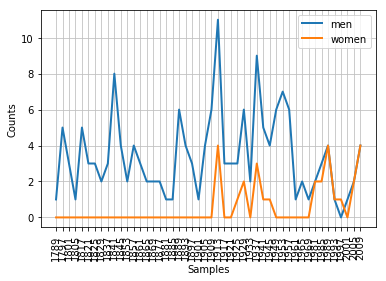

In [18]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in ["men", "women"] if word.lower().startswith(target))
cfd.plot()

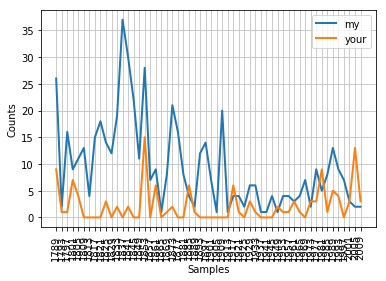

In [19]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in ["my", "your"] if word.lower().startswith(target))
cfd.plot()

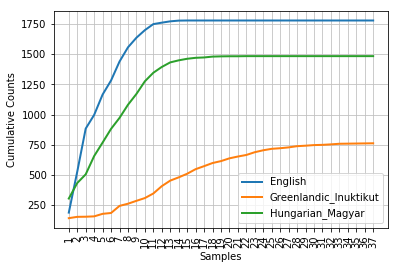

In [36]:
# Universal Declaration of Human Rights in >300 languages

languages = ["English", "Greenlandic_Inuktikut", "Hungarian_Magyar"]
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + "-Latin1"))
cfd.plot(cumulative = True)

In [37]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]

'The Adventures of B'

In [38]:
words = gutenberg.words("burgess-busterbrown.txt")
words[1:20]

['The',
 'Adventures',
 'of',
 'Buster',
 'Bear',
 'by',
 'Thornton',
 'W',
 '.',
 'Burgess',
 '1920',
 ']',
 'I',
 'BUSTER',
 'BEAR',
 'GOES',
 'FISHING',
 'Buster',
 'Bear']

In [39]:
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:20]

[['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.'],
 ['Once',
  'more',
  'he',
  'yawned',
  ',',
  'and',
  'slowly',
  'got',
  'to',
  'his',
  'feet',
  'and',
  'shook',
  'himself',
  '.'],
 ['Then',
  'he',
  'walked',
  'over',
  'to',
  'a',
  'big',
  'pine',
  '-',
  'tree',
  ',',
  'stood',
  'up',
  'on',
  'his',
  'hind',
  'legs',
  ',',
  'reached',
  'as',
  'high',
  'up',
  'on',
  'the',
  'trunk',
  'of',
  'the',
  'tree',
  'as',
  'he',
  'could',
  ',',
  'and',
  'scratched',
  'the',
  'bark',
  'with',
  'his',
  'great',
  'claws',
  '.'],
 ['After',
  'that',
  'he',
  'yawned',
  'until',
  'it',
  'seemed',
  'as',
  'if',
  'his',

In [20]:
# How to remove filler words from texts
stopwords.words("english")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
genre_word = [(genre, word)
             for genre in ["hobbies", "lore"]
             for word in brown.words(categories=genre)]
len(genre_word)

                         0    1    2    3    4    5    6    7    8    9   10   11 
              English    0  185  525  883  997 1166 1283 1440 1558 1638 1701 1751 
Greenlandic_Inuktikut    0  139  150  151  154  175  182  241  259  283  306  344 
daughters of the land of the land of the land of the land of the land of the land of the land of the land of the land of the land 

In [44]:
genre_word[:12]

[('hobbies', 'Too'), ('hobbies', 'often'), ('hobbies', 'a'), ('hobbies', 'beginning'), ('hobbies', 'bodybuilder'), ('hobbies', 'has'), ('hobbies', 'to'), ('hobbies', 'do'), ('hobbies', 'his'), ('hobbies', 'training'), ('hobbies', 'secretly'), ('hobbies', 'either')]

In [45]:
# Number of letters per word plotted for 2 languages

languages = ["English", "German_Deutsch", "Greenlandic_Inuktikut"]
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + "-Latin1"))

cfd.tabulate(conditions = ["English", "Greenlandic_Inuktikut"],
            samples = range(12), cumulative = True)

                         0    1    2    3    4    5    6    7    8    9   10   11 
              English    0  185  525  883  997 1166 1283 1440 1558 1638 1701 1751 
Greenlandic_Inuktikut    0  139  150  151  154  175  182  241  259  283  306  344 


In [46]:
# Generate random text with bigrams

def generate_model(cfdist, word, num = 31):
    for i in range(num):
        print(word, end = " ")
        word = cfdist[word].max()
        
text = nltk.corpus.genesis.words("english-kjv.txt")
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

rword = "daughters"

cfd[rword]
generate_model(cfd, rword)

daughters of the land of the land of the land of the land of the land of the land of the land of the land of the land of the land 

In [57]:
def plural(word):
    if word.endswith("y"):
        return word[:-1] + "ies"
    elif word[-1] in "sx" or word[-2:] in ["sh", "ch"]:
        return word + "es"
    elif word.endswith("an"):
        return word[:-2] + "en"
    elif word.endswith("um"):
        return word[:-2] + "a"
    elif word is "sheep":
        return word
    else:
        return word + "s"
    
plural("bacterium")

'bacteria'

# Lexica

In [59]:
# Fraction of non-stopwords

def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words("english")
    content = [word for word in text if word.lower() not in stopwords]
    return len(content) / len(text)

content_fraction(gutenberg.words())

0.5766118034965496

In [60]:
puzzle_letters = nltk.FreqDist("egivrvonl")
obligatory = "r"
wordlist = nltk.corpus.words.words()
[word for word in wordlist if len(word) >= 6
    and obligatory in word
    and nltk.FreqDist(word) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [62]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [66]:
female_names = names.words("female.txt")
male_names = names.words("male.txt")

[name for name in male_names if name in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

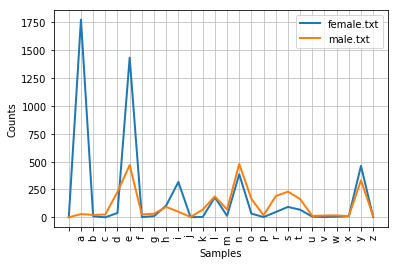

In [68]:
# Last letters of names

cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

In [70]:
entries = nltk.corpus.cmudict.entries()

syllable = ["K", "AH0", "T", "S"]
[word for word, pron in entries if pron[-4:] == syllable]

['achatz', "advocate's", 'advocates', 'affricates', 'baskets', 'biscuits', 'blankets', 'brackets', 'buckets', 'caskets', 'certificates', 'chicots', "circuit's", 'circuits', "connecticut's", "cricket's", 'crickets', 'dockets', 'gaskets', "lockett's", "market's", 'markets', 'microcircuits', 'pickets', 'pickpockets', 'pockets', 'predicates', 'rackets', "rocket's", 'rockets', 'silicates', 'skyrockets', 'sockets', "supermarket's", "syndicate's", 'syndicates', 'thickets', "ticket's", 'tickets', 'trinkets', 'wastebaskets', 'wickets', 'wickets']

In [71]:
syllable = ["K", "AE1", "T", "S"]
[word for word, pron in entries if pron[-4:] == syllable]

["cat's", 'cats', 'kats', 'katz']

In [72]:
[pron for word, pron in entries if word == "women"]

[['W', 'IH1', 'M', 'AH0', 'N']]

In [73]:
syllable = [ "M", "AH0", "N"]
# [word for word, pron in entries if pron[-3:] == syllable]

In [77]:
# Swadesh is 200 common words. Languages identified with the fileid codes

swadesh.fileids()

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']

In [78]:
swadesh.words("en")

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [79]:
# Multiple language cognates

fr2en = swadesh.entries(["fr", "en"])

fr2en

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there'), ('qui', 'who'), ('quoi', 'what'), ('où', 'where'), ('quand', 'when'), ('comment', 'how'), ('ne...pas', 'not'), ('tout', 'all'), ('plusieurs', 'many'), ('quelques', 'some'), ('peu', 'few'), ('autre', 'other'), ('un', 'one'), ('deux', 'two'), ('trois', 'three'), ('quatre', 'four'), ('cinq', 'five'), ('grand', 'big'), ('long', 'long'), ('large', 'wide'), ('épais', 'thick'), ('lourd', 'heavy'), ('petit', 'small'), ('court', 'short'), ('étroit', 'narrow'), ('mince', 'thin'), ('femme', 'woman'), ('homme', 'man (adult male)'), ('homme', 'man (human being)'), ('enfant', 'child'), ('femme, épouse', 'wife'), ('mari, époux', 'husband'), ('mère', 'mother'), ('père', 'father'), ('animal', 'animal'), ('poisson', 'fish'), ('oiseau', 'bird'), ('chien', 'dog'), ('pou', 'louse'), ('serpent', 'snake'), ('v

In [82]:
translate = dict(fr2en)

translate["chien"]

'dog'

In [83]:
# You can add new languages to the dictionary with update

de2en = swadesh.entries(["de", "en"])
translate.update(dict(de2en))

translate["Hund"]

'dog'

In [84]:
translate["chien"]

'dog'

In [90]:
# Synonym sets

wn.synsets("motorcar")

[Synset('car.n.01')]

In [91]:
wn.synset("car.n.01").lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [92]:
wn.synsets("cat")

[Synset('cat.n.01'), Synset('guy.n.01'), Synset('cat.n.03'), Synset('kat.n.01'), Synset('cat-o'-nine-tails.n.01'), Synset('caterpillar.n.02'), Synset('big_cat.n.01'), Synset('computerized_tomography.n.01'), Synset('cat.v.01'), Synset('vomit.v.01')]

In [94]:
wn.synset("guy.n.01").lemma_names()

['guy', 'cat', 'hombre', 'bozo']

In [95]:
# Hyponyms come below in the word tree (hence the name...). Hence types of car are hyponyms of car

kitty = wn.synset("cat.n.01")
types_of_cat = kitty.hyponyms()
types_of_cat[0]

Synset('domestic_cat.n.01')

In [96]:
sorted(lemma.name() for synset in types_of_cat for lemma in synset.lemmas())

['Felis_catus', 'Felis_domesticus', 'domestic_cat', 'house_cat', 'wildcat']

In [97]:
# Of course, there are hypernyms too. 

kitty.hypernyms()

[Synset('feline.n.01')]

In [99]:
paths = kitty.hypernym_paths()
len(paths)

1

In [100]:
[synset.name() for synset in paths[0]]

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'living_thing.n.01', 'organism.n.01', 'animal.n.01', 'chordate.n.01', 'vertebrate.n.01', 'mammal.n.01', 'placental.n.01', 'carnivore.n.01', 'feline.n.01', 'cat.n.01']

In [102]:
# Most general (root) hypernym

kitty.root_hypernyms()

[Synset('entity.n.01')]

In [110]:
# Meronyms are components

wn.synset("body.n.01").part_meronyms()

[Synset('arm.n.01'), Synset('articulatory_system.n.01'), Synset('body_substance.n.01'), Synset('cavity.n.04'), Synset('circulatory_system.n.01'), Synset('crotch.n.02'), Synset('digestive_system.n.01'), Synset('endocrine_system.n.01'), Synset('head.n.01'), Synset('leg.n.01'), Synset('lymphatic_system.n.01'), Synset('musculoskeletal_system.n.01'), Synset('neck.n.01'), Synset('nervous_system.n.01'), Synset('pressure_point.n.01'), Synset('respiratory_system.n.01'), Synset('sensory_system.n.02'), Synset('torso.n.01'), Synset('vascular_system.n.01')]

In [122]:
wn.synset("water.n.01").substance_meronyms()

[Synset('hydrogen.n.01'), Synset('oxygen.n.01')]

In [130]:
# Holonyms are words for that in which the original word is contained

wn.synset("bird.n.01").member_holonyms()

[Synset('aves.n.01'), Synset('flock.n.02')]

In [131]:
for synset in wn.synsets("mint", wn.NOUN):
    print(synset.name() + ":", synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [148]:
# Entailments are relationships between verbs - walking entails stepping

wn.synset("eat.v.01").entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [150]:
wn.lemma("horizontal.a.01.horizontal").antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

In [170]:
def define(word):
    for synset in wn.synsets(word, wn.NOUN):
        print(synset.name() + ":", synset.definition())
        
define("glucose")

glucose.n.01: a monosaccharide sugar that has several forms; an important source of physiological energy


In [171]:
cat = wn.synset("cat.n.01")
dog = wn.synset("dog.n.01")
turtle = wn.synset("turtle.n.02")
chemistry = wn.synset("chemistry.n.01")
glyceraldehyde = wn.synset("glyceraldehyde.n.01")
toluene = wn.synset("toluene.n.01")
acetone = wn.synset("acetone.n.01")
butanone = wn.synset("butanone.n.01")
glucose = wn.synset("glucose.n.01")

cat.lowest_common_hypernyms(dog)

[Synset('carnivore.n.01')]

In [167]:
acetone.lowest_common_hypernyms(butanone)

[Synset('ketone.n.01')]

In [168]:
acetone.lowest_common_hypernyms(toluene)

[Synset('organic_compound.n.01')]

In [172]:
glucose.lowest_common_hypernyms(glyceraldehyde)

[Synset('organic_compound.n.01')]

In [173]:
# Similarity is closeness in the word net

cat.path_similarity(dog)

0.2

In [174]:
butanone.path_similarity(acetone)

0.3333333333333333

In [175]:
cat.path_similarity(glucose)

0.045454545454545456

# Exercises

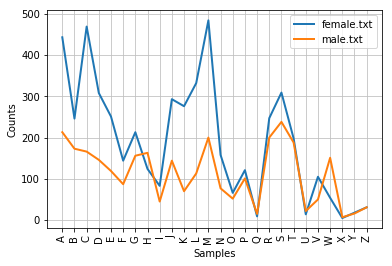

In [178]:
# Exercise 8

# First letters of names

cfd = nltk.ConditionalFreqDist(
    (fileid, name[:1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

In [186]:
# Exercise 5

wn.synset("oxygen.n.01").substance_holonyms()

[Synset('air.n.01'), Synset('ozone.n.01'), Synset('water.n.01')]

In [191]:
wn.synset("air.n.01").substance_meronyms()

[Synset('argon.n.01'), Synset('krypton.n.01'), Synset('neon.n.01'), Synset('nitrogen.n.01'), Synset('oxygen.n.01'), Synset('xenon.n.01')]

In [204]:
# Exercise 13

allsyn = wn.all_synsets("n")
# no_holonyms = 

for a in allsyn:
    print(a)

Synset('entity.n.01')
Synset('physical_entity.n.01')
Synset('abstraction.n.06')
Synset('thing.n.12')
Synset('object.n.01')
Synset('whole.n.02')
Synset('congener.n.03')
Synset('living_thing.n.01')
Synset('organism.n.01')
Synset('benthos.n.02')
Synset('dwarf.n.03')
Synset('heterotroph.n.01')
Synset('parent.n.02')
Synset('life.n.10')
Synset('biont.n.01')
Synset('cell.n.02')
Synset('causal_agent.n.01')
Synset('person.n.01')
Synset('animal.n.01')
Synset('plant.n.02')
Synset('native.n.03')
Synset('natural_object.n.01')
Synset('substance.n.01')
Synset('substance.n.07')
Synset('matter.n.03')
Synset('food.n.01')
Synset('nutrient.n.02')
Synset('artifact.n.01')
Synset('article.n.02')
Synset('psychological_feature.n.01')
Synset('cognition.n.01')
Synset('motivation.n.01')
Synset('attribute.n.02')
Synset('state.n.02')
Synset('feeling.n.01')
Synset('location.n.01')
Synset('shape.n.02')
Synset('time.n.05')
Synset('space.n.01')
Synset('absolute_space.n.01')
Synset('phase_space.n.01')
Synset('event.n.01

Synset('backstop.n.03')
Synset('emergency_procedure.n.01')
Synset('experimental_procedure.n.01')
Synset('double-blind_procedure.n.01')
Synset('makeshift.n.01')
Synset('crutch.n.02')
Synset('improvisation.n.02')
Synset('pis_aller.n.01')
Synset('desperate_measure.n.01')
Synset('open_sesame.n.01')
Synset('salvation.n.02')
Synset('tooth.n.04')
Synset('voice.n.05')
Synset('wings.n.01')
Synset('casting_lots.n.01')
Synset('resolution.n.11')
Synset('adoption.n.01')
Synset('embrace.n.03')
Synset('election.n.02')
Synset('co-option.n.01')
Synset('reelection.n.01')
Synset('plebiscite.n.01')
Synset('referendum.n.01')
Synset('election.n.01')
Synset('vote.n.02')
Synset('general_election.n.01')
Synset('primary.n.01')
Synset('direct_primary.n.01')
Synset('closed_primary.n.01')
Synset('open_primary.n.01')
Synset('by-election.n.01')
Synset('runoff.n.02')
Synset('vote.n.01')
Synset('block_vote.n.01')
Synset('cumulative_vote.n.01')
Synset('secret_ballot.n.01')
Synset('split_ticket.n.01')
Synset('straight_t

Synset('tinting.n.01')
Synset('hair_coloring.n.03')
Synset('dyeing.n.01')
Synset('staining.n.01')
Synset('gram's_method.n.01')
Synset('environmentalism.n.02')
Synset('fixation.n.04')
Synset('soiling.n.01')
Synset('staining.n.02')
Synset('contamination.n.03')
Synset('dust_contamination.n.02')
Synset('wetting.n.01')
Synset('submersion.n.02')
Synset('drenching.n.01')
Synset('moistening.n.01')
Synset('splash.n.06')
Synset('watering.n.02')
Synset('sprinkle.n.02')
Synset('chew.n.02')
Synset('chomping.n.01')
Synset('mumbling.n.02')
Synset('rumination.n.02')
Synset('bruxism.n.01')
Synset('defoliation.n.02')
Synset('motion.n.06')
Synset('movement.n.11')
Synset('approach.n.02')
Synset('access.n.06')
Synset('back_door.n.01')
Synset('closing.n.03')
Synset('landing_approach.n.01')
Synset('overshoot.n.01')
Synset('progress.n.02')
Synset('push.n.05')
Synset('career.n.02')
Synset('march.n.03')
Synset('plain_sailing.n.01')
Synset('locomotion.n.02')
Synset('brachiation.n.01')
Synset('walk.n.01')
Synset(

Synset('exaggeration.n.02')
Synset('extension.n.02')
Synset('spread.n.10')
Synset('circulation.n.06')
Synset('recirculation.n.01')
Synset('dispersion.n.03')
Synset('crop-dusting.n.01')
Synset('scatter.n.02')
Synset('contracture.n.01')
Synset('extension.n.05')
Synset('hyperextension.n.01')
Synset('contraction.n.01')
Synset('tetanus.n.02')
Synset('truncation.n.03')
Synset('uterine_contraction.n.01')
Synset('braxton-hicks_contraction.n.01')
Synset('vaginismus.n.01')
Synset('stretch.n.05')
Synset('expansion.n.04')
Synset('amplification.n.01')
Synset('annotation.n.02')
Synset('supplementation.n.02')
Synset('accumulation.n.03')
Synset('buildup.n.01')
Synset('deposit.n.09')
Synset('repositing.n.01')
Synset('stockpiling.n.01')
Synset('inclusion.n.04')
Synset('incorporation.n.03')
Synset('annexation.n.01')
Synset('aggrandizement.n.01')
Synset('self-aggrandizement.n.01')
Synset('strengthening.n.02')
Synset('intensification.n.01')
Synset('roughness.n.07')
Synset('intensification.n.02')
Synset('ag

Synset('curling.n.01')
Synset('bowling.n.01')
Synset('frame.n.11')
Synset('tenpins.n.01')
Synset('ninepins.n.01')
Synset('duckpins.n.01')
Synset('candlepins.n.01')
Synset('lawn_bowling.n.01')
Synset('bocce.n.01')
Synset('pall-mall.n.01')
Synset('athletic_game.n.01')
Synset('ice_hockey.n.01')
Synset('goalkeeper.n.02')
Synset('tetherball.n.01')
Synset('water_polo.n.01')
Synset('outdoor_game.n.01')
Synset('golf.n.01')
Synset('professional_golf.n.01')
Synset('round_of_golf.n.01')
Synset('medal_play.n.01')
Synset('match_play.n.01')
Synset('miniature_golf.n.01')
Synset('croquet.n.01')
Synset('paintball.n.02')
Synset('quoits.n.01')
Synset('shuffleboard.n.01')
Synset('field_game.n.01')
Synset('field_hockey.n.01')
Synset('shinny.n.01')
Synset('football.n.01')
Synset('american_football.n.01')
Synset('professional_football.n.01')
Synset('touch_football.n.01')
Synset('hurling.n.01')
Synset('rugby.n.01')
Synset('knock_on.n.01')
Synset('ball_game.n.01')
Synset('baseball.n.01')
Synset('ball.n.11')
Sy

Synset('spot_pass.n.01')
Synset('tackle.n.05')
Synset('jugglery.n.02')
Synset('obstruction.n.05')
Synset('blocking.n.01')
Synset('interference.n.04')
Synset('trap_block.n.01')
Synset('check.n.12')
Synset('crosscheck.n.02')
Synset('poke_check.n.01')
Synset('razzle-dazzle.n.01')
Synset('basketball_play.n.01')
Synset('pick.n.08')
Synset('switch.n.06')
Synset('give-and-go.n.01')
Synset('baseball_play.n.01')
Synset('double_play.n.01')
Synset('triple_play.n.01')
Synset('pick-off.n.01')
Synset('squeeze_play.n.02')
Synset('suicide_squeeze_play.n.01')
Synset('safety_squeeze_play.n.01')
Synset('footwork.n.01')
Synset('stroke.n.01')
Synset('cut.n.14')
Synset('swipe.n.01')
Synset('tennis_stroke.n.01')
Synset('return.n.11')
Synset('backhand.n.01')
Synset('chop.n.04')
Synset('drive.n.12')
Synset('drop_shot.n.01')
Synset('forehand.n.01')
Synset('forehand_drive.n.01')
Synset('get.n.01')
Synset('backhand_drive.n.01')
Synset('two-handed_backhand.n.01')
Synset('ground_stroke.n.01')
Synset('serve.n.01')
S

Synset('extravagance.n.03')
Synset('squandering.n.01')
Synset('squandermania.n.01')
Synset('wrong.n.02')
Synset('injury.n.05')
Synset('injury.n.04')
Synset('injustice.n.01')
Synset('infliction.n.02')
Synset('transgression.n.03')
Synset('transgression.n.01')
Synset('abomination.n.03')
Synset('evil.n.01')
Synset('villainy.n.02')
Synset('deviltry.n.01')
Synset('enormity.n.04')
Synset('foul_play.n.01')
Synset('irreverence.n.02')
Synset('sexual_immorality.n.01')
Synset('profanation.n.01')
Synset('depravity.n.02')
Synset('vice.n.02')
Synset('pornography.n.01')
Synset('child_pornography.n.01')
Synset('intemperance.n.03')
Synset('intemperance.n.02')
Synset('prostitution.n.01')
Synset('profligacy.n.02')
Synset('drink.n.02')
Synset('drinking_bout.n.01')
Synset('package_tour.n.01')
Synset('pub_crawl.n.01')
Synset('whistle-stop_tour.n.01')
Synset('jag.n.04')
Synset('dishonesty.n.02')
Synset('treachery.n.02')
Synset('double_cross.n.01')
Synset('sellout.n.01')
Synset('charlatanism.n.01')
Synset('pla

Synset('composing.n.02')
Synset('arrangement.n.06')
Synset('orchestration.n.02')
Synset('realization.n.05')
Synset('recapitulation.n.04')
Synset('invention.n.03')
Synset('neologism.n.02')
Synset('devisal.n.01')
Synset('conceptualization.n.01')
Synset('approach.n.01')
Synset('framing.n.01')
Synset('avenue.n.01')
Synset('creating_by_removal.n.01')
Synset('excavation.n.01')
Synset('carving.n.02')
Synset('petroglyph.n.01')
Synset('truncation.n.02')
Synset('drilling.n.01')
Synset('gouge.n.03')
Synset('puncture.n.03')
Synset('centesis.n.01')
Synset('abdominocentesis.n.01')
Synset('amniocentesis.n.01')
Synset('arthrocentesis.n.01')
Synset('celiocentesis.n.01')
Synset('lumbar_puncture.n.01')
Synset('thoracocentesis.n.01')
Synset('fetoscopy.n.01')
Synset('perforation.n.03')
Synset('prick.n.04')
Synset('venipuncture.n.01')
Synset('film_editing.n.01')
Synset('search.n.01')
Synset('exploration.n.02')
Synset('foraging.n.01')
Synset('frisk.n.01')
Synset('strip_search.n.01')
Synset('looking.n.02')
Sy

Synset('obedience.n.03')
Synset('occupation.n.02')
Synset('management.n.01')
Synset('conducting.n.02')
Synset('database_management.n.01')
Synset('finance.n.03')
Synset('homemaking.n.01')
Synset('misconduct.n.01')
Synset('mismanagement.n.01')
Synset('screwup.n.01')
Synset('treatment.n.02')
Synset('bioremediation.n.02')
Synset('dealing.n.01')
Synset('supervision.n.01')
Synset('invigilation.n.01')
Synset('administration.n.01')
Synset('conducting.n.01')
Synset('line_management.n.01')
Synset('organization.n.04')
Synset('running.n.04')
Synset('administrivia.n.01')
Synset('polity.n.03')
Synset('nonprofit_organization.n.01')
Synset('rationalization.n.04')
Synset('reorganization.n.01')
Synset('self-organization.n.01')
Synset('syndication.n.01')
Synset('authorization.n.04')
Synset('sanction.n.04')
Synset('license.n.04')
Synset('benefit_of_clergy.n.01')
Synset('name.n.05')
Synset('nihil_obstat.n.02')
Synset('certification.n.01')
Synset('disenfranchisement.n.01')
Synset('accreditation.n.01')
Synse

Synset('parainfluenza_virus.n.01')
Synset('arenavirus.n.01')
Synset('junin_virus.n.01')
Synset('lassa_virus.n.01')
Synset('lymphocytic_choriomeningitis_virus.n.01')
Synset('machupo_virus.n.01')
Synset('bunyaviridae.n.01')
Synset('bunyavirus.n.01')
Synset('filoviridae.n.01')
Synset('filovirus.n.01')
Synset('ebola_virus.n.01')
Synset('marburg_virus.n.01')
Synset('togaviridae.n.01')
Synset('alphavirus.n.01')
Synset('flaviviridae.n.01')
Synset('flavivirus.n.01')
Synset('west_nile_virus.n.01')
Synset('arenaviridae.n.01')
Synset('rhabdoviridae.n.01')
Synset('vesiculovirus.n.01')
Synset('reoviridae.n.01')
Synset('poxvirus.n.01')
Synset('myxoma_virus.n.01')
Synset('variola_virus.n.01')
Synset('variola_major.n.02')
Synset('variola_minor.n.02')
Synset('tobacco_mosaic_virus.n.01')
Synset('viroid.n.01')
Synset('bacteriophage.n.01')
Synset('coliphage.n.01')
Synset('typhoid_bacteriophage.n.01')
Synset('plant_virus.n.01')
Synset('animal_virus.n.01')
Synset('hepadnavirus.n.01')
Synset('retrovirus.n.01

Synset('coerebidae.n.01')
Synset('honeycreeper.n.02')
Synset('coereba.n.01')
Synset('banana_quit.n.01')
Synset('passeridae.n.01')
Synset('sparrow.n.01')
Synset('passer.n.05')
Synset('english_sparrow.n.01')
Synset('tree_sparrow.n.01')
Synset('grosbeak.n.01')
Synset('hesperiphona.n.01')
Synset('evening_grosbeak.n.01')
Synset('coccothraustes.n.01')
Synset('hawfinch.n.01')
Synset('pinicola.n.01')
Synset('pine_grosbeak.n.01')
Synset('richmondena.n.01')
Synset('cardinal.n.04')
Synset('genus_pyrrhuloxia.n.01')
Synset('pyrrhuloxia.n.01')
Synset('towhee.n.01')
Synset('pipilo.n.01')
Synset('chewink.n.01')
Synset('chlorura.n.01')
Synset('green-tailed_towhee.n.01')
Synset('ploceidae.n.01')
Synset('weaver.n.02')
Synset('ploceus.n.01')
Synset('baya.n.01')
Synset('vidua.n.01')
Synset('whydah.n.01')
Synset('padda.n.01')
Synset('java_sparrow.n.01')
Synset('estrilda.n.01')
Synset('avadavat.n.01')
Synset('poephila.n.01')
Synset('grassfinch.n.01')
Synset('zebra_finch.n.01')
Synset('drepanididae.n.01')
Syn

Synset('dromaeosaur.n.01')
Synset('genus_deinonychus.n.01')
Synset('deinonychus.n.01')
Synset('genus_utahraptor.n.01')
Synset('utahraptor.n.01')
Synset('genus_mononychus.n.01')
Synset('mononychus_olecranus.n.01')
Synset('synapsida.n.01')
Synset('synapsid.n.01')
Synset('therapsida.n.01')
Synset('therapsid.n.01')
Synset('chronoperates.n.01')
Synset('chronoperates_paradoxus.n.01')
Synset('cynodontia.n.01')
Synset('cynodont.n.01')
Synset('exaeretodon.n.01')
Synset('dicynodontia.n.01')
Synset('dicynodont.n.01')
Synset('ischigualastia.n.01')
Synset('ictodosauria.n.01')
Synset('ictodosaur.n.01')
Synset('pelycosauria.n.01')
Synset('pelycosaur.n.01')
Synset('edaphosauridae.n.01')
Synset('genus_edaphosaurus.n.01')
Synset('edaphosaurus.n.01')
Synset('genus_dimetrodon.n.01')
Synset('dimetrodon.n.01')
Synset('pterosauria.n.01')
Synset('pterosaur.n.01')
Synset('pterodactylidae.n.01')
Synset('pterodactylus.n.01')
Synset('pterodactyl.n.01')
Synset('thecodontia.n.01')
Synset('thecodont.n.01')
Synset('i

Synset('carapace.n.01')
Synset('plastron.n.05')
Synset('shell.n.10')
Synset('valve.n.05')
Synset('valve.n.04')
Synset('test.n.06')
Synset('scallop_shell.n.01')
Synset('oyster_shell.n.01')
Synset('phragmocone.n.01')
Synset('apodeme.n.01')
Synset('theca.n.02')
Synset('lorica.n.01')
Synset('coelenteron.n.01')
Synset('invertebrate.n.01')
Synset('zoophyte.n.01')
Synset('parazoa.n.01')
Synset('porifera.n.01')
Synset('sponge.n.04')
Synset('sponge_genus.n.01')
Synset('flagellated_cell.n.01')
Synset('choanocyte.n.01')
Synset('hyalospongiae.n.01')
Synset('glass_sponge.n.01')
Synset('euplectella.n.01')
Synset('venus's_flower_basket.n.01')
Synset('coelenterate_family.n.01')
Synset('coelenterate_genus.n.01')
Synset('metazoa.n.01')
Synset('metazoan.n.01')
Synset('cnidaria.n.01')
Synset('coelenterate.n.01')
Synset('planula.n.01')
Synset('polyp.n.02')
Synset('medusa.n.02')
Synset('scyphozoa.n.01')
Synset('jellyfish.n.02')
Synset('aegina.n.02')
Synset('scyphozoan.n.01')
Synset('chrysaora.n.01')
Synset(

Synset('elephant_seal.n.01')
Synset('erignathus.n.01')
Synset('bearded_seal.n.01')
Synset('cystophora.n.01')
Synset('hooded_seal.n.01')
Synset('odobenidae.n.01')
Synset('odobenus.n.01')
Synset('walrus.n.01')
Synset('atlantic_walrus.n.01')
Synset('pacific_walrus.n.01')
Synset('fissipedia.n.01')
Synset('fissiped_mammal.n.01')
Synset('tubulidentata.n.01')
Synset('orycteropodidae.n.01')
Synset('orycteropus.n.01')
Synset('aardvark.n.01')
Synset('canidae.n.01')
Synset('canine.n.02')
Synset('bitch.n.04')
Synset('brood_bitch.n.01')
Synset('canis.n.01')
Synset('dog.n.01')
Synset('pooch.n.01')
Synset('cur.n.01')
Synset('feist.n.01')
Synset('pariah_dog.n.01')
Synset('lapdog.n.01')
Synset('toy_dog.n.01')
Synset('chihuahua.n.03')
Synset('japanese_spaniel.n.01')
Synset('maltese_dog.n.01')
Synset('pekinese.n.01')
Synset('shih-tzu.n.01')
Synset('toy_spaniel.n.01')
Synset('english_toy_spaniel.n.01')
Synset('blenheim_spaniel.n.01')
Synset('king_charles_spaniel.n.01')
Synset('papillon.n.01')
Synset('toy_

Synset('armored_scale.n.01')
Synset('aspidiotus.n.01')
Synset('san_jose_scale.n.01')
Synset('dactylopiidae.n.01')
Synset('dactylopius.n.01')
Synset('cochineal_insect.n.01')
Synset('pseudococcidae.n.01')
Synset('pseudococcus.n.01')
Synset('mealybug.n.01')
Synset('citrophilous_mealybug.n.01')
Synset('comstock_mealybug.n.01')
Synset('planococcus.n.01')
Synset('citrus_mealybug.n.01')
Synset('plant_louse.n.01')
Synset('aphidoidea.n.01')
Synset('aphid.n.01')
Synset('aphididae.n.01')
Synset('aphis.n.01')
Synset('apple_aphid.n.01')
Synset('blackfly.n.01')
Synset('greenfly.n.01')
Synset('green_peach_aphid.n.01')
Synset('pale_chrysanthemum_aphid.n.01')
Synset('ant_cow.n.01')
Synset('eriosoma.n.01')
Synset('woolly_aphid.n.01')
Synset('woolly_apple_aphid.n.01')
Synset('prociphilus.n.01')
Synset('woolly_alder_aphid.n.01')
Synset('adelgidae.n.01')
Synset('adelges.n.01')
Synset('adelgid.n.01')
Synset('balsam_woolly_aphid.n.01')
Synset('spruce_gall_aphid.n.01')
Synset('pineus.n.01')
Synset('pine_leaf_

Synset('mountain_goat.n.01')
Synset('naemorhedus.n.01')
Synset('goral.n.01')
Synset('capricornis.n.01')
Synset('serow.n.01')
Synset('rupicapra.n.01')
Synset('chamois.n.02')
Synset('budorcas.n.01')
Synset('takin.n.01')
Synset('antelope.n.01')
Synset('antilope.n.01')
Synset('blackbuck.n.01')
Synset('litocranius.n.01')
Synset('gerenuk.n.01')
Synset('genus_addax.n.01')
Synset('addax.n.01')
Synset('connochaetes.n.01')
Synset('gnu.n.01')
Synset('madoqua.n.01')
Synset('dik-dik.n.01')
Synset('alcelaphus.n.01')
Synset('hartebeest.n.01')
Synset('damaliscus.n.01')
Synset('sassaby.n.01')
Synset('aepyceros.n.01')
Synset('impala.n.01')
Synset('gazella.n.01')
Synset('gazelle.n.01')
Synset('thomson's_gazelle.n.01')
Synset('gazella_subgutturosa.n.01')
Synset('antidorcas.n.01')
Synset('springbok.n.01')
Synset('tragelaphus.n.01')
Synset('bongo.n.02')
Synset('kudu.n.01')
Synset('greater_kudu.n.01')
Synset('lesser_kudu.n.01')
Synset('harnessed_antelope.n.01')
Synset('nyala.n.02')
Synset('mountain_nyala.n.0

Synset('equetus.n.01')
Synset('striped_drum.n.01')
Synset('jackknife-fish.n.01')
Synset('bairdiella.n.01')
Synset('silver_perch.n.01')
Synset('sciaenops.n.01')
Synset('red_drum.n.01')
Synset('sciaena.n.01')
Synset('mulloway.n.01')
Synset('maigre.n.01')
Synset('croaker.n.02')
Synset('micropogonias.n.01')
Synset('atlantic_croaker.n.01')
Synset('umbrina.n.01')
Synset('yellowfin_croaker.n.01')
Synset('menticirrhus.n.01')
Synset('whiting.n.04')
Synset('kingfish.n.04')
Synset('king_whiting.n.01')
Synset('northern_whiting.n.01')
Synset('corbina.n.01')
Synset('silver_whiting.n.01')
Synset('genyonemus.n.01')
Synset('white_croaker.n.02')
Synset('seriphus.n.01')
Synset('white_croaker.n.01')
Synset('sea_trout.n.02')
Synset('cynoscion.n.01')
Synset('weakfish.n.02')
Synset('spotted_weakfish.n.01')
Synset('mullidae.n.01')
Synset('mullet.n.03')
Synset('mullus.n.01')
Synset('goatfish.n.01')
Synset('red_goatfish.n.01')
Synset('mulloidichthys.n.01')
Synset('yellow_goatfish.n.01')
Synset('mugiloidea.n.01'

Synset('backpacking_tent.n.01')
Synset('backplate.n.01')
Synset('back_porch.n.01')
Synset('back_room.n.01')
Synset('backroom.n.01')
Synset('backsaw.n.01')
Synset('backscratcher.n.02')
Synset('backseat.n.02')
Synset('backspace_key.n.01')
Synset('backstairs.n.01')
Synset('backstay.n.01')
Synset('backstitch.n.01')
Synset('backstop.n.02')
Synset('backsword.n.02')
Synset('backup.n.04')
Synset('backup_system.n.01')
Synset('backyard.n.01')
Synset('bacteria_bed.n.01')
Synset('badminton_court.n.01')
Synset('badminton_equipment.n.01')
Synset('badminton_racket.n.01')
Synset('baffle.n.01')
Synset('bag.n.01')
Synset('bag.n.06')
Synset('bag.n.04')
Synset('bagatelle.n.02')
Synset('baggage.n.01')
Synset('baggage.n.03')
Synset('baggage_car.n.01')
Synset('baggage_claim.n.01')
Synset('bagger.n.02')
Synset('bagpipe.n.01')
Synset('bailey.n.04')
Synset('bailey.n.03')
Synset('bailey_bridge.n.01')
Synset('bain-marie.n.01')
Synset('bait.n.02')
Synset('baize.n.01')
Synset('bakery.n.01')
Synset('balaclava.n.01')

Synset('cabin.n.01')
Synset('cabin.n.02')
Synset('cabin_car.n.01')
Synset('cabin_class.n.01')
Synset('cabin_cruiser.n.01')
Synset('cabinet.n.01')
Synset('cabinet.n.04')
Synset('cabinet.n.03')
Synset('cabinetwork.n.01')
Synset('cabin_liner.n.01')
Synset('cable.n.03')
Synset('cable.n.06')
Synset('cable.n.02')
Synset('cable_car.n.01')
Synset('cable_railway.n.01')
Synset('cache.n.01')
Synset('cache.n.03')
Synset('cachet.n.03')
Synset('caddy.n.01')
Synset('caesium_clock.n.01')
Synset('cafe.n.01')
Synset('cafeteria.n.01')
Synset('cafeteria_facility.n.01')
Synset('cafeteria_tray.n.01')
Synset('caff.n.01')
Synset('caftan.n.02')
Synset('caftan.n.01')
Synset('cage.n.01')
Synset('cage.n.04')
Synset('cagoule.n.01')
Synset('caisson.n.04')
Synset('caisson.n.03')
Synset('caisson.n.02')
Synset('cake.n.01')
Synset('calabash.n.05')
Synset('calamine_lotion.n.01')
Synset('calash.n.02')
Synset('calash.n.01')
Synset('calceus.n.01')
Synset('calcimine.n.01')
Synset('calcium_blocker.n.01')
Synset('calculator.n

Synset('cooper_union.n.01')
Synset('cope.n.02')
Synset('coping_saw.n.01')
Synset('copper_mine.n.01')
Synset('copperplate.n.03')
Synset('copperplate.n.02')
Synset('copperware.n.01')
Synset('copy.n.02')
Synset('copyholder.n.01')
Synset('coquille.n.02')
Synset('coracle.n.01')
Synset('corbel.n.01')
Synset('corbel_arch.n.01')
Synset('corbel_step.n.01')
Synset('corbie_gable.n.01')
Synset('cord.n.01')
Synset('cord.n.04')
Synset('cord.n.03')
Synset('cordage.n.02')
Synset('cordite.n.01')
Synset('cordon.n.03')
Synset('cords.n.01')
Synset('corduroy.n.02')
Synset('core.n.10')
Synset('core.n.09')
Synset('core.n.08')
Synset('core_bit.n.01')
Synset('core_drill.n.01')
Synset('corer.n.01')
Synset('cork.n.04')
Synset('corker.n.02')
Synset('corkscrew.n.01')
Synset('corncrib.n.01')
Synset('cornell_university.n.01')
Synset('corner.n.04')
Synset('corner.n.11')
Synset('corner.n.03')
Synset('corner_pocket.n.01')
Synset('corner_post.n.01')
Synset('cornerstone.n.03')
Synset('cornerstone.n.02')
Synset('cornet.n.

Synset('electric_chair.n.01')
Synset('electric_clock.n.01')
Synset('electric-discharge_lamp.n.01')
Synset('electric_fan.n.01')
Synset('electric_frying_pan.n.01')
Synset('electric_furnace.n.01')
Synset('electric_guitar.n.01')
Synset('electric_hammer.n.01')
Synset('electric_heater.n.01')
Synset('electric_lamp.n.01')
Synset('electric_locomotive.n.01')
Synset('electric_main.n.01')
Synset('electric_meter.n.01')
Synset('electric_mixer.n.01')
Synset('electric_motor.n.01')
Synset('electric_organ.n.01')
Synset('electric_range.n.01')
Synset('electric_refrigerator.n.01')
Synset('electric_socket.n.01')
Synset('electric_toothbrush.n.01')
Synset('electric_typewriter.n.01')
Synset('electro-acoustic_transducer.n.01')
Synset('electrode.n.01')
Synset('electrodynamometer.n.01')
Synset('electroencephalograph.n.01')
Synset('electrograph.n.02')
Synset('electrograph.n.01')
Synset('electrolytic.n.01')
Synset('electrolytic_cell.n.01')
Synset('electromagnet.n.01')
Synset('electromagnetic_delay_line.n.01')
Synse

Synset('goffer.n.03')
Synset('goffer.n.02')
Synset('goggles.n.01')
Synset('go-kart.n.01')
Synset('golconda.n.01')
Synset('goldbrick.n.03')
Synset('golden_calf.n.01')
Synset('golden_gate_bridge.n.01')
Synset('gold_foil.n.01')
Synset('gold_leaf.n.01')
Synset('gold_medal.n.01')
Synset('goldmine.n.02')
Synset('goldmine.n.01')
Synset('gold_plate.n.02')
Synset('gold_plate.n.01')
Synset('golf_bag.n.01')
Synset('golf_ball.n.01')
Synset('golfcart.n.01')
Synset('golf_club.n.02')
Synset('golf-club_head.n.01')
Synset('golf_course.n.01')
Synset('golf_equipment.n.01')
Synset('golf_glove.n.01')
Synset('golf_range.n.01')
Synset('golliwog.n.01')
Synset('gondola.n.02')
Synset('gondola_car.n.01')
Synset('gong.n.01')
Synset('goniometer.n.01')
Synset('gordian_knot.n.02')
Synset('gore.n.03')
Synset('gorgerin.n.01')
Synset('gorget.n.01')
Synset('gossamer.n.01')
Synset('gota_canal.n.01')
Synset('gothic_arch.n.01')
Synset('gouache.n.02')
Synset('gouache.n.01')
Synset('gouge.n.02')
Synset('gourd.n.01')
Synset('

Synset('kaopectate.n.01')
Synset('kat.n.01')
Synset('katharometer.n.01')
Synset('kayak.n.01')
Synset('kazoo.n.01')
Synset('keel.n.03')
Synset('keelboat.n.01')
Synset('keelson.n.01')
Synset('keep.n.02')
Synset('keepsake.n.01')
Synset('keg.n.02')
Synset('kennel.n.01')
Synset('kepi.n.01')
Synset('keratoscope.n.01')
Synset('kerchief.n.01')
Synset('kern.n.02')
Synset('kerr_cell.n.01')
Synset('ketamine.n.01')
Synset('ketch.n.01')
Synset('ketoprofen.n.01')
Synset('ketorolac.n.01')
Synset('ketorolac_tromethamine.n.01')
Synset('kettle.n.01')
Synset('kettle.n.04')
Synset('key.n.01')
Synset('key.n.15')
Synset('keyboard.n.02')
Synset('keyboard.n.01')
Synset('keyboard_buffer.n.01')
Synset('keyboard_instrument.n.01')
Synset('keyhole.n.01')
Synset('keyhole_saw.n.01')
Synset('key_ring.n.01')
Synset('keystone.n.02')
Synset('khadi.n.01')
Synset('khaki.n.01')
Synset('khakis.n.01')
Synset('khimar.n.01')
Synset('khukuri.n.01')
Synset('kibble.n.02')
Synset('kick_pleat.n.01')
Synset('kicksorter.n.01')
Synset

Synset('moleskin.n.01')
Synset('molindone.n.01')
Synset('molotov_cocktail.n.01')
Synset('monastery.n.01')
Synset('monastic_habit.n.01')
Synset('moneybag.n.01')
Synset('money_belt.n.01')
Synset('monitor.n.06')
Synset('monitor.n.05')
Synset('monitor.n.04')
Synset('monitor.n.03')
Synset('monkey_bridge.n.01')
Synset('monkey_ladder.n.01')
Synset('monkey-wrench.n.01')
Synset('monk's_cloth.n.01')
Synset('monoamine_oxidase_inhibitor.n.01')
Synset('monochrome.n.01')
Synset('monocle.n.01')
Synset('monofocal_lens_implant.n.01')
Synset('monolith.n.01')
Synset('monoplane.n.01')
Synset('monopoly_board.n.01')
Synset('monorail.n.01')
Synset('monotype.n.02')
Synset('monstrance.n.02')
Synset('mooring.n.02')
Synset('mooring_anchor.n.01')
Synset('mooring_tower.n.01')
Synset('moorish_arch.n.01')
Synset('moped.n.01')
Synset('mop_handle.n.01')
Synset('moquette.n.01')
Synset('moreen.n.01')
Synset('morgue.n.01')
Synset('morion.n.01')
Synset('morning-after_pill.n.01')
Synset('morning_dress.n.02')
Synset('mornin

Synset('pipe.n.04')
Synset('pipe_bomb.n.01')
Synset('pipe_cleaner.n.01')
Synset('pipe_cutter.n.01')
Synset('pipefitting.n.01')
Synset('pipeline.n.02')
Synset('piperacillin.n.01')
Synset('pipe_rack.n.01')
Synset('piperazine.n.01')
Synset('piperocaine.n.01')
Synset('pipet.n.01')
Synset('pipe_vise.n.01')
Synset('pipe_wrench.n.01')
Synset('piping.n.01')
Synset('pique.n.01')
Synset('pirate.n.03')
Synset('piroxicam.n.01')
Synset('piste.n.02')
Synset('piste.n.01')
Synset('pistol.n.01')
Synset('pistol_grip.n.01')
Synset('piston.n.02')
Synset('piston_ring.n.01')
Synset('piston_rod.n.01')
Synset('pit.n.09')
Synset('pit.n.08')
Synset('pit.n.07')
Synset('pit.n.06')
Synset('pit.n.05')
Synset('pitcher.n.02')
Synset('pitchfork.n.01')
Synset('pitching_wedge.n.01')
Synset('pitch_pipe.n.01')
Synset('pithead.n.01')
Synset('pith_hat.n.01')
Synset('piton.n.01')
Synset('pitot-static_tube.n.01')
Synset('pitot_tube.n.01')
Synset('pitprop.n.01')
Synset('pitsaw.n.01')
Synset('pivot.n.02')
Synset('pivoting_windo

Synset('rudder.n.01')
Synset('rudder_blade.n.01')
Synset('rudderpost.n.01')
Synset('rue.n.04')
Synset('rug.n.01')
Synset('rugby_ball.n.01')
Synset('ruin.n.02')
Synset('rule.n.12')
Synset('rumble.n.02')
Synset('rumble_seat.n.01')
Synset('rummer.n.01')
Synset('rumpus_room.n.01')
Synset('runcible_spoon.n.01')
Synset('rundle.n.01')
Synset('rung.n.01')
Synset('runner.n.09')
Synset('runner.n.08')
Synset('running_board.n.01')
Synset('running_shoe.n.01')
Synset('running_stitch.n.01')
Synset('running_suit.n.01')
Synset('runway.n.04')
Synset('runway.n.03')
Synset('runway.n.02')
Synset('rushlight.n.01')
Synset('russet.n.01')
Synset('rya.n.01')
Synset('saber.n.01')
Synset('saber_saw.n.01')
Synset('sabin_vaccine.n.01')
Synset('sable.n.04')
Synset('sable.n.01')
Synset('sable_coat.n.01')
Synset('sabot.n.01')
Synset('sachet.n.01')
Synset('sack.n.01')
Synset('sack.n.05')
Synset('sackbut.n.01')
Synset('sackcloth.n.02')
Synset('sackcloth.n.01')
Synset('sack_coat.n.01')
Synset('sacking.n.01')
Synset('sadd

Synset('spinning_jenny.n.01')
Synset('spinning_machine.n.01')
Synset('spinning_rod.n.01')
Synset('spinning_wheel.n.01')
Synset('spiral.n.04')
Synset('spiral_bandage.n.01')
Synset('spiral_ratchet_screwdriver.n.01')
Synset('spiral_spring.n.01')
Synset('spirit_lamp.n.01')
Synset('spirit_stove.n.01')
Synset('spirogram.n.01')
Synset('spirograph.n.01')
Synset('spirometer.n.01')
Synset('spit.n.03')
Synset('spitball.n.01')
Synset('spittoon.n.01')
Synset('splashboard.n.02')
Synset('splasher.n.01')
Synset('splat.n.02')
Synset('splay.n.01')
Synset('splice.n.01')
Synset('splicer.n.03')
Synset('spline.n.01')
Synset('splint.n.02')
Synset('split.n.08')
Synset('split_rail.n.01')
Synset('spode.n.02')
Synset('spoiler.n.05')
Synset('spoiler.n.04')
Synset('spoke.n.01')
Synset('spokeshave.n.01')
Synset('sponge_cloth.n.01')
Synset('sponge_mop.n.01')
Synset('spoon.n.01')
Synset('spoon.n.03')
Synset('spork.n.01')
Synset('sporran.n.01')
Synset('sporting_goods.n.01')
Synset('sport_kite.n.01')
Synset('sports_car

Synset('togs.n.01')
Synset('toilet.n.01')
Synset('toilet.n.02')
Synset('toilet_bag.n.01')
Synset('toilet_bowl.n.01')
Synset('toilet_kit.n.01')
Synset('toilet_powder.n.01')
Synset('toiletry.n.01')
Synset('toilet_seat.n.01')
Synset('toilet_soap.n.01')
Synset('toilet_water.n.01')
Synset('tokamak.n.01')
Synset('token.n.03')
Synset('tolazamide.n.01')
Synset('tolazoline.n.01')
Synset('tolbutamide.n.01')
Synset('tole.n.01')
Synset('tollbooth.n.01')
Synset('toll_bridge.n.01')
Synset('tollgate.n.01')
Synset('toll_line.n.01')
Synset('tolmetin_sodium.n.01')
Synset('tomahawk.n.01')
Synset('tommy_gun.n.01')
Synset('tomograph.n.01')
Synset('tone_arm.n.01')
Synset('toner.n.03')
Synset('tongs.n.01')
Synset('tongue.n.07')
Synset('tongue_and_groove_joint.n.01')
Synset('tongue_depressor.n.01')
Synset('tonic.n.04')
Synset('tonometer.n.01')
Synset('tool.n.01')
Synset('tool_bag.n.01')
Synset('toolbox.n.01')
Synset('toolshed.n.01')
Synset('tooth.n.02')
Synset('tooth.n.05')
Synset('toothbrush.n.01')
Synset('t

Synset('zarf.n.01')
Synset('zeppelin.n.02')
Synset('zero.n.04')
Synset('ziggurat.n.01')
Synset('zill.n.01')
Synset('zinc_ointment.n.01')
Synset('zip_gun.n.01')
Synset('zither.n.01')
Synset('zodiac.n.02')
Synset('zoot_suit.n.01')
Synset('ramp.n.03')
Synset('human_nature.n.01')
Synset('trait.n.01')
Synset('character.n.09')
Synset('unit_character.n.01')
Synset('thing.n.09')
Synset('common_denominator.n.02')
Synset('personality.n.01')
Synset('identity.n.01')
Synset('gender_identity.n.01')
Synset('identification.n.05')
Synset('personhood.n.01')
Synset('personableness.n.01')
Synset('anal_personality.n.01')
Synset('genital_personality.n.01')
Synset('narcissistic_personality.n.01')
Synset('obsessive-compulsive_personality.n.01')
Synset('oral_personality.n.01')
Synset('character.n.03')
Synset('spirit.n.03')
Synset('outwardness.n.03')
Synset('inwardness.n.04')
Synset('spirituality.n.02')
Synset('worldliness.n.02')
Synset('extraversion.n.01')
Synset('introversion.n.03')
Synset('ambiversion.n.01')

Synset('focus.n.03')
Synset('coherence.n.02')
Synset('preciseness.n.01')
Synset('perspicuity.n.01')
Synset('unambiguity.n.01')
Synset('explicitness.n.01')
Synset('incomprehensibility.n.01')
Synset('inscrutability.n.01')
Synset('illegibility.n.01')
Synset('impenetrability.n.02')
Synset('noise.n.05')
Synset('opacity.n.02')
Synset('obscureness.n.03')
Synset('unintelligibility.n.02')
Synset('unclearness.n.01')
Synset('elusiveness.n.01')
Synset('vagueness.n.01')
Synset('haziness.n.01')
Synset('inexplicitness.n.01')
Synset('implicitness.n.01')
Synset('ambiguity.n.02')
Synset('equivocation.n.02')
Synset('polysemy.n.01')
Synset('twilight_zone.n.02')
Synset('righteousness.n.01')
Synset('impeccability.n.02')
Synset('uprightness.n.03')
Synset('piety.n.01')
Synset('devoutness.n.01')
Synset('religiosity.n.01')
Synset('dutifulness.n.01')
Synset('godliness.n.01')
Synset('unrighteousness.n.01')
Synset('sin.n.01')
Synset('mark_of_cain.n.01')
Synset('impiety.n.01')
Synset('undutifulness.n.01')
Synset('i

Synset('absorptivity.n.01')
Synset('dissolubility.n.01')
Synset('drippiness.n.01')
Synset('reflection.n.08')
Synset('echo.n.01')
Synset('re-echo.n.01')
Synset('echo.n.04')
Synset('deflection.n.04')
Synset('windage.n.04')
Synset('refractivity.n.01')
Synset('temperature.n.01')
Synset('heat_content.n.01')
Synset('randomness.n.01')
Synset('conformational_entropy.n.01')
Synset('absolute_temperature.n.01')
Synset('absolute_zero.n.01')
Synset('curie_temperature.n.01')
Synset('dew_point.n.01')
Synset('flash_point.n.02')
Synset('freezing_point.n.01')
Synset('boiling_point.n.01')
Synset('mercury.n.04')
Synset('room_temperature.n.01')
Synset('simmer.n.01')
Synset('basal_body_temperature.n.01')
Synset('body_temperature.n.01')
Synset('coldness.n.03')
Synset('chill.n.01')
Synset('chilliness.n.01')
Synset('frostiness.n.01')
Synset('cool.n.01')
Synset('hotness.n.01')
Synset('calefaction.n.01')
Synset('fieriness.n.01')
Synset('torridity.n.01')
Synset('warmth.n.03')
Synset('lukewarmness.n.01')
Synset('w

Synset('inability.n.02')
Synset('paper_tiger.n.01')
Synset('incapability.n.02')
Synset('incapacity.n.02')
Synset('ineffectiveness.n.01')
Synset('inefficacy.n.01')
Synset('romanticism.n.03')
Synset('stardust.n.01')
Synset('analyticity.n.01')
Synset('compositeness.n.01')
Synset('primality.n.01')
Synset('selectivity.n.01')
Synset('domesticity.n.01')
Synset('infiniteness.n.01')
Synset('finiteness.n.01')
Synset('quantifiability.n.01')
Synset('ratability.n.02')
Synset('scalability.n.01')
Synset('solubility.n.03')
Synset('insolubility.n.02')
Synset('stuff.n.05')
Synset('comicality.n.01')
Synset('hot_stuff.n.01')
Synset('humor.n.04')
Synset('pathos.n.01')
Synset('tone.n.10')
Synset('optimism.n.02')
Synset('pessimism.n.02')
Synset('epicurism.n.01')
Synset('gourmandism.n.01')
Synset('brachycephaly.n.01')
Synset('dolichocephaly.n.01')
Synset('relativity.n.02')
Synset('response.n.07')
Synset('responsiveness.n.02')
Synset('unresponsiveness.n.01')
Synset('frigidity.n.01')
Synset('resistance.n.08')
S

Synset('epigastrium.n.01')
Synset('cardia.n.01')
Synset('lymphatic_system.n.01')
Synset('thoracic_duct.n.01')
Synset('lymph_vessel.n.01')
Synset('lacteal.n.01')
Synset('vascular_structure.n.01')
Synset('vessel.n.01')
Synset('liquid_body_substance.n.01')
Synset('extracellular_fluid.n.01')
Synset('interstitial_fluid.n.01')
Synset('intracellular_fluid.n.01')
Synset('juice.n.04')
Synset('cancer_juice.n.01')
Synset('karyolymph.n.01')
Synset('milk.n.02')
Synset('mother's_milk.n.01')
Synset('colostrum.n.01')
Synset('amniotic_cavity.n.01')
Synset('amniotic_fluid.n.01')
Synset('blood.n.01')
Synset('arterial_blood.n.01')
Synset('blood_group.n.01')
Synset('a.n.07')
Synset('b.n.07')
Synset('ab.n.04')
Synset('o.n.03')
Synset('rh-positive_blood_type.n.01')
Synset('rh-negative_blood_type.n.01')
Synset('gore.n.02')
Synset('lifeblood.n.01')
Synset('bloodstream.n.01')
Synset('clot.n.01')
Synset('blood_clot.n.01')
Synset('cord_blood.n.01')
Synset('menorrhea.n.01')
Synset('venous_blood.n.01')
Synset('whol

Synset('nose.n.01')
Synset('beak.n.04')
Synset('conk.n.01')
Synset('hawk_nose.n.01')
Synset('proboscis.n.01')
Synset('bridge.n.04')
Synset('pug_nose.n.01')
Synset('roman_nose.n.01')
Synset('chin.n.01')
Synset('double_chin.n.01')
Synset('dimple.n.03')
Synset('lantern_jaw.n.01')
Synset('nostril.n.01')
Synset('posterior_naris.n.01')
Synset('naris.n.01')
Synset('face.n.01')
Synset('face.n.07')
Synset('countenance.n.03')
Synset('pudding_face.n.01')
Synset('feature.n.02')
Synset('facial_muscle.n.01')
Synset('temporalis_muscle.n.01')
Synset('brow.n.01')
Synset('temple.n.02')
Synset('cheek.n.01')
Synset('jowl.n.02')
Synset('jaw.n.02')
Synset('ridge.n.05')
Synset('supraorbital_ridge.n.01')
Synset('excrescence.n.02')
Synset('vegetation.n.03')
Synset('rudiment.n.02')
Synset('wall.n.03')
Synset('abdominal_wall.n.01')
Synset('humor.n.05')
Synset('pericardial_sac.n.01')
Synset('rotator_cuff.n.01')
Synset('respiratory_center.n.01')
Synset('spindle.n.01')
Synset('syncytium.n.01')
Synset('serous_membra

Synset('distribution.n.01')
Synset('equidistribution.n.01')
Synset('genetic_map.n.01')
Synset('kinship_system.n.01')
Synset('lattice.n.01')
Synset('living_arrangement.n.01')
Synset('redundancy.n.03')
Synset('topology.n.04')
Synset('bus_topology.n.01')
Synset('loop_topology.n.01')
Synset('star_topology.n.01')
Synset('mesh_topology.n.01')
Synset('physical_topology.n.01')
Synset('logical_topology.n.01')
Synset('unitization.n.01')
Synset('configuration.n.01')
Synset('space_lattice.n.01')
Synset('hierarchical_structure.n.01')
Synset('hierarchical_classification_system.n.01')
Synset('file_system.n.01')
Synset('classification.n.03')
Synset('grouping.n.03')
Synset('rating_system.n.01')
Synset('abo_blood_group_system.n.01')
Synset('appraisal.n.01')
Synset('critical_appraisal.n.01')
Synset('criticism.n.02')
Synset('examen.n.02')
Synset('knock.n.02')
Synset('self-criticism.n.01')
Synset('attribution.n.02')
Synset('attribution.n.01')
Synset('zoomorphism.n.01')
Synset('animatism.n.01')
Synset('impu

Synset('self-deception.n.01')
Synset('mistake.n.02')
Synset('illusion.n.02')
Synset('bubble.n.03')
Synset('will-o'-the-wisp.n.02')
Synset('wishful_thinking.n.01')
Synset('delusion.n.02')
Synset('autism.n.01')
Synset('infantile_autism.n.01')
Synset('apparition.n.03')
Synset('unidentified_flying_object.n.01')
Synset('flying_dutchman.n.02')
Synset('ghost.n.01')
Synset('disorientation.n.01')
Synset('plan.n.01')
Synset('program.n.02')
Synset('master_plan.n.01')
Synset('apollo_program.n.01')
Synset('gemini_program.n.01')
Synset('mercury_program.n.01')
Synset('defense_program.n.01')
Synset('educational_program.n.01')
Synset('rehabilitation_program.n.01')
Synset('space_program.n.01')
Synset('superfund_program.n.01')
Synset('vocational_rehabilitation_program.n.01')
Synset('tax_program.n.01')
Synset('policy.n.01')
Synset('activism.n.01')
Synset('beggar-my-neighbor_policy.n.01')
Synset('blueprint.n.01')
Synset('plan_of_action.n.01')
Synset('battle_plan.n.01')
Synset('system.n.07')
Synset('credit_

Synset('naval_engineering.n.01')
Synset('rocketry.n.01')
Synset('metrology.n.01')
Synset('nutrition.n.03')
Synset('futurology.n.01')
Synset('psychology.n.01')
Synset('abnormal_psychology.n.01')
Synset('associationism.n.01')
Synset('atomism.n.01')
Synset('applied_psychology.n.01')
Synset('cognitive_psychology.n.01')
Synset('comparative_psychology.n.01')
Synset('developmental_psychology.n.01')
Synset('differential_psychology.n.01')
Synset('experimental_psychology.n.01')
Synset('psychophysics.n.01')
Synset('behaviorism.n.01')
Synset('functionalism.n.01')
Synset('memory.n.05')
Synset('problem_solving.n.01')
Synset('psycholinguistics.n.01')
Synset('physiological_psychology.n.01')
Synset('psychometry.n.01')
Synset('reflexology.n.01')
Synset('gestalt_psychology.n.01')
Synset('social_psychology.n.01')
Synset('psychodynamics.n.02')
Synset('group_dynamics.n.01')
Synset('information_science.n.01')
Synset('natural_language_processing.n.01')
Synset('cybernetics.n.01')
Synset('cognitive_science.n.01

Synset('dropline.n.01')
Synset('screamer.n.02')
Synset('streamer.n.02')
Synset('title.n.01')
Synset('title.n.08')
Synset('title.n.03')
Synset('credit.n.08')
Synset('caption.n.03')
Synset('subtitle.n.02')
Synset('mistranslation.n.01')
Synset('pony.n.03')
Synset('retroversion.n.02')
Synset('subtitle.n.01')
Synset('supertitle.n.01')
Synset('line_of_poetry.n.01')
Synset('acatalectic.n.01')
Synset('alexandrine.n.01')
Synset('catalectic.n.01')
Synset('hypercatalectic.n.01')
Synset('by-line.n.01')
Synset('dateline.n.02')
Synset('written_communication.n.01')
Synset('transcription.n.01')
Synset('transliteration.n.01')
Synset('phonetic_transcription.n.01')
Synset('shorthand.n.01')
Synset('longhand.n.01')
Synset('minuscule.n.02')
Synset('copperplate.n.01')
Synset('italic.n.01')
Synset('round_hand.n.01')
Synset('orthography.n.01')
Synset('script.n.03')
Synset('aramaic.n.02')
Synset('armenian.n.03')
Synset('avestan.n.02')
Synset('babylonian.n.02')
Synset('brahmi.n.01')
Synset('devanagari.n.01')
Syn

Synset('game_law.n.01')
Synset('homestead_law.n.01')
Synset('poor_law.n.01')
Synset('riot_act.n.02')
Synset('riot_act.n.01')
Synset('criminal_law.n.01')
Synset('court_order.n.01')
Synset('decree.n.01')
Synset('consent_decree.n.01')
Synset('curfew.n.03')
Synset('decree_nisi.n.01')
Synset('divestiture.n.01')
Synset('imperial_decree.n.01')
Synset('ukase.n.01')
Synset('legal_separation.n.01')
Synset('pragmatic_sanction.n.01')
Synset('programma.n.01')
Synset('prohibition.n.01')
Synset('prohibition.n.02')
Synset('stay.n.03')
Synset('stay_of_execution.n.01')
Synset('banning-order.n.01')
Synset('injunction.n.02')
Synset('mandatory_injunction.n.01')
Synset('permanent_injunction.n.01')
Synset('temporary_injunction.n.01')
Synset('brief.n.01')
Synset('amicus_curiae_brief.n.01')
Synset('will.n.03')
Synset('probate.n.01')
Synset('codicil.n.01')
Synset('living_will.n.01')
Synset('deed.n.01')
Synset('assignment.n.02')
Synset('bill_of_sale.n.01')
Synset('deed_poll.n.01')
Synset('enfeoffment.n.01')
Syns

Synset('low_blow.n.01')
Synset('scurrility.n.01')
Synset('stinger.n.02')
Synset('vituperation.n.01')
Synset('impudence.n.01')
Synset('sass.n.01')
Synset('interpolation.n.01')
Synset('statement.n.01')
Synset('statement.n.04')
Synset('amendment.n.02')
Synset('thing.n.07')
Synset('truth.n.03')
Synset('gospel.n.02')
Synset('antinomy.n.01')
Synset('paradox.n.01')
Synset('description.n.01')
Synset('job_description.n.01')
Synset('specification.n.01')
Synset('computer_architecture.n.01')
Synset('neural_network.n.01')
Synset('network_architecture.n.01')
Synset('declaration.n.01')
Synset('announcement.n.01')
Synset('bastardization.n.01')
Synset('edict.n.01')
Synset('bull.n.10')
Synset('promulgation.n.02')
Synset('confession.n.04')
Synset('manifesto.n.01')
Synset('communist_manifesto.n.01')
Synset('pronouncement.n.01')
Synset('bill_of_rights.n.01')
Synset('first_amendment.n.01')
Synset('fifth_amendment.n.01')
Synset('fourteenth_amendment.n.01')
Synset('eighteenth_amendment.n.01')
Synset('nineteen

Synset('dhegiha.n.02')
Synset('fox.n.07')
Synset('hidatsa.n.02')
Synset('hunkpapa.n.02')
Synset('illinois.n.03')
Synset('haida.n.02')
Synset('kansa.n.02')
Synset('kickapoo.n.02')
Synset('malecite.n.02')
Synset('massachuset.n.01')
Synset('menomini.n.02')
Synset('micmac.n.02')
Synset('mohican.n.02')
Synset('nanticoke.n.02')
Synset('ofo.n.02')
Synset('oglala.n.02')
Synset('ojibwa.n.02')
Synset('omaha.n.03')
Synset('osage.n.03')
Synset('pamlico.n.02')
Synset('ponca.n.02')
Synset('potawatomi.n.02')
Synset('powhatan.n.03')
Synset('quapaw.n.02')
Synset('shawnee.n.02')
Synset('alabama.n.04')
Synset('chickasaw.n.02')
Synset('choctaw.n.02')
Synset('hitchiti.n.02')
Synset('koasati.n.02')
Synset('muskogee.n.03')
Synset('santee.n.02')
Synset('seminole.n.02')
Synset('tlingit.n.02')
Synset('tutelo.n.02')
Synset('winnebago.n.02')
Synset('muskhogean.n.02')
Synset('na-dene.n.01')
Synset('mosan.n.01')
Synset('chemakuan.n.01')
Synset('chemakum.n.01')
Synset('salish.n.01')
Synset('skagit.n.02')
Synset('wak

Synset('gongorism.n.01')
Synset('conceit.n.04')
Synset('development.n.09')
Synset('device.n.02')
Synset('doctorspeak.n.01')
Synset('ecobabble.n.01')
Synset('eloquence.n.01')
Synset('euphuism.n.01')
Synset('eurobabble.n.01')
Synset('flatness.n.02')
Synset('formulation.n.03')
Synset('gobbledygook.n.01')
Synset('grandiosity.n.01')
Synset('headlinese.n.01')
Synset('honorific.n.01')
Synset('jargon.n.03')
Synset('journalese.n.01')
Synset('legalese.n.01')
Synset('manner_of_speaking.n.01')
Synset('music_genre.n.01')
Synset('officialese.n.01')
Synset('pathos.n.03')
Synset('prose.n.02')
Synset('psychobabble.n.01')
Synset('rhetoric.n.01')
Synset('saltiness.n.01')
Synset('self-expression.n.01')
Synset('articulation.n.03')
Synset('archaism.n.01')
Synset('boilerplate.n.01')
Synset('colloquialism.n.01')
Synset('mot_juste.n.01')
Synset('verbalization.n.02')
Synset('verbalization.n.01')
Synset('parlance.n.01')
Synset('americanism.n.02')
Synset('anglicism.n.01')
Synset('gallicism.n.01')
Synset('wording.

Synset('grammatical_rule.n.01')
Synset('transformation.n.03')
Synset('morphological_rule.n.01')
Synset('standard.n.01')
Synset('benchmark.n.01')
Synset('earned_run_average.n.01')
Synset('grade_point_average.n.01')
Synset('procrustean_standard.n.01')
Synset('yardstick.n.01')
Synset('target.n.01')
Synset('clout.n.01')
Synset('drogue.n.01')
Synset('white_line.n.01')
Synset('indicator.n.02')
Synset('blinker.n.02')
Synset('armband.n.01')
Synset('rocket.n.04')
Synset('electronic_signal.n.01')
Synset('blip.n.02')
Synset('radar_echo.n.01')
Synset('clutter.n.02')
Synset('radar_beacon.n.01')
Synset('radio_beacon.n.01')
Synset('beacon.n.01')
Synset('star_shell.n.01')
Synset('bengal_light.n.01')
Synset('very_light.n.01')
Synset('signal_fire.n.01')
Synset('input_signal.n.01')
Synset('output_signal.n.01')
Synset('printout.n.01')
Synset('readout.n.01')
Synset('fire_alarm.n.01')
Synset('foghorn.n.01')
Synset('horn.n.03')
Synset('red_flag.n.01')
Synset('siren.n.03')
Synset('tocsin.n.01')
Synset('stopli

Synset('topspin.n.01')
Synset('wallow.n.02')
Synset('run.n.13')
Synset('relaxation.n.04')
Synset('thaw.n.03')
Synset('substitution.n.01')
Synset('business_cycle.n.01')
Synset('daily_variation.n.01')
Synset('diurnal_variation.n.01')
Synset('tide.n.02')
Synset('shift.n.01')
Synset('amplitude.n.01')
Synset('luxation.n.01')
Synset('subluxation.n.01')
Synset('progress.n.03')
Synset('rise.n.04')
Synset('spread.n.01')
Synset('stampede.n.02')
Synset('translation.n.02')
Synset('spray.n.06')
Synset('spritz.n.01')
Synset('angelus_bell.n.01')
Synset('bell_ringing.n.01')
Synset('return.n.03')
Synset('volution.n.01')
Synset('affair.n.03')
Synset('party.n.04')
Synset('bash.n.02')
Synset('birthday_party.n.01')
Synset('bunfight.n.01')
Synset('ceilidh.n.01')
Synset('cocktail_party.n.01')
Synset('dance.n.04')
Synset('ball.n.09')
Synset('cotillion.n.01')
Synset('masked_ball.n.01')
Synset('promenade.n.01')
Synset('barn_dance.n.01')
Synset('hop.n.03')
Synset('rave.n.01')
Synset('fete.n.01')
Synset('luau.n.0

Synset('mousse.n.01')
Synset('pavlova.n.02')
Synset('peach_melba.n.01')
Synset('whip.n.03')
Synset('prune_whip.n.01')
Synset('pudding.n.03')
Synset('pudding.n.02')
Synset('syllabub.n.02')
Synset('tiramisu.n.01')
Synset('trifle.n.01')
Synset('tipsy_cake.n.01')
Synset('jello.n.01')
Synset('charlotte_russe.n.01')
Synset('apple_dumpling.n.01')
Synset('ice.n.05')
Synset('water_ice.n.02')
Synset('ice_cream.n.01')
Synset('ice-cream_cone.n.01')
Synset('chocolate_ice_cream.n.01')
Synset('choc-ice.n.01')
Synset('neapolitan_ice_cream.n.01')
Synset('peach_ice_cream.n.01')
Synset('sherbert.n.01')
Synset('strawberry_ice_cream.n.01')
Synset('tutti-frutti.n.01')
Synset('vanilla_ice_cream.n.01')
Synset('ice_lolly.n.01')
Synset('ice_milk.n.01')
Synset('frozen_yogurt.n.01')
Synset('snowball.n.03')
Synset('snowball.n.02')
Synset('parfait.n.01')
Synset('ice-cream_sundae.n.01')
Synset('split.n.07')
Synset('banana_split.n.01')
Synset('frozen_pudding.n.01')
Synset('frozen_custard.n.01')
Synset('pudding.n.01')

Synset('watermelon.n.02')
Synset('cherry.n.03')
Synset('sweet_cherry.n.02')
Synset('bing_cherry.n.01')
Synset('heart_cherry.n.02')
Synset('blackheart.n.02')
Synset('capulin.n.02')
Synset('sour_cherry.n.03')
Synset('amarelle.n.02')
Synset('morello.n.02')
Synset('cocoa_plum.n.02')
Synset('gherkin.n.01')
Synset('grape.n.01')
Synset('fox_grape.n.02')
Synset('concord_grape.n.01')
Synset('catawba.n.02')
Synset('muscadine.n.02')
Synset('scuppernong.n.01')
Synset('slipskin_grape.n.01')
Synset('vinifera_grape.n.02')
Synset('emperor.n.02')
Synset('muscat.n.04')
Synset('ribier.n.01')
Synset('sultana.n.01')
Synset('tokay.n.02')
Synset('flame_tokay.n.01')
Synset('thompson_seedless.n.01')
Synset('custard_apple.n.02')
Synset('cherimoya.n.02')
Synset('soursop.n.02')
Synset('bullock's_heart.n.02')
Synset('sweetsop.n.02')
Synset('ilama.n.02')
Synset('pond_apple.n.02')
Synset('papaw.n.02')
Synset('papaya.n.02')
Synset('kai_apple.n.01')
Synset('ketembilla.n.02')
Synset('ackee.n.01')
Synset('durian.n.02')


Synset('liqueur.n.01')
Synset('absinth.n.01')
Synset('amaretto.n.01')
Synset('anisette.n.01')
Synset('benedictine.n.02')
Synset('chartreuse.n.01')
Synset('coffee_liqueur.n.01')
Synset('creme_de_cacao.n.01')
Synset('creme_de_menthe.n.01')
Synset('creme_de_fraise.n.01')
Synset('drambuie.n.01')
Synset('galliano.n.01')
Synset('orange_liqueur.n.01')
Synset('curacao.n.02')
Synset('triple_sec.n.01')
Synset('grand_marnier.n.01')
Synset('kummel.n.01')
Synset('maraschino.n.01')
Synset('pastis.n.01')
Synset('pernod.n.01')
Synset('pousse-cafe.n.01')
Synset('kahlua.n.01')
Synset('ratafia.n.01')
Synset('sambuca.n.01')
Synset('mixed_drink.n.01')
Synset('cocktail.n.01')
Synset('dom_pedro.n.01')
Synset('highball.n.01')
Synset('eye_opener.n.01')
Synset('nightcap.n.01')
Synset('hair_of_the_dog.n.01')
Synset('shandygaff.n.01')
Synset('stirrup_cup.n.01')
Synset('sundowner.n.02')
Synset('mixer.n.02')
Synset('bishop.n.02')
Synset('bloody_mary.n.02')
Synset('virgin_mary.n.02')
Synset('bullshot.n.01')
Synset('

Synset('prelacy.n.01')
Synset('ministry.n.01')
Synset('rabbinate.n.01')
Synset('ministry.n.03')
Synset('foreign_office.n.01')
Synset('home_office.n.01')
Synset('french_foreign_office.n.01')
Synset('free_french.n.01')
Synset('department.n.01')
Synset('academic_department.n.01')
Synset('anthropology_department.n.01')
Synset('art_department.n.01')
Synset('biology_department.n.01')
Synset('chemistry_department.n.01')
Synset('department_of_computer_science.n.01')
Synset('economics_department.n.01')
Synset('english_department.n.01')
Synset('history_department.n.01')
Synset('linguistics_department.n.01')
Synset('mathematics_department.n.01')
Synset('philosophy_department.n.01')
Synset('physics_department.n.01')
Synset('music_department.n.01')
Synset('psychology_department.n.01')
Synset('sociology_department.n.01')
Synset('business_department.n.01')
Synset('advertising_department.n.01')
Synset('editorial_department.n.01')
Synset('city_desk.n.01')
Synset('sports_desk.n.01')
Synset('parts_depart

Synset('ecumenical_council.n.01')
Synset('nicaea.n.03')
Synset('constantinople.n.05')
Synset('ephesus.n.02')
Synset('chalcedon.n.02')
Synset('constantinople.n.04')
Synset('constantinople.n.03')
Synset('nicaea.n.02')
Synset('constantinople.n.02')
Synset('lateran_council.n.01')
Synset('first_lateran_council.n.01')
Synset('second_lateran_council.n.01')
Synset('third_lateran_council.n.01')
Synset('fourth_lateran_council.n.01')
Synset('lyons.n.03')
Synset('lyons.n.02')
Synset('vienne.n.02')
Synset('constance.n.02')
Synset('council_of_basel-ferrara-florence.n.01')
Synset('fifth_lateran_council.n.01')
Synset('council_of_trent.n.01')
Synset('vatican_council.n.01')
Synset('first_vatican_council.n.01')
Synset('second_vatican_council.n.01')
Synset('continental_congress.n.01')
Synset('congress.n.03')
Synset('diet.n.02')
Synset('chamber.n.04')
Synset('chamber_of_commerce.n.01')
Synset('parliament.n.01')
Synset('british_parliament.n.01')
Synset('dail_eireann.n.01')
Synset('knesset.n.01')
Synset('oir

Synset('river_basin.n.01')
Synset('detention_basin.n.01')
Synset('retention_basin.n.01')
Synset('caucasia.n.01')
Synset('transcaucasia.n.01')
Synset('celestial_equator.n.01')
Synset('celestial_point.n.01')
Synset('equinoctial_point.n.01')
Synset('vernal_equinox.n.02')
Synset('autumnal_equinox.n.02')
Synset('celestial_sphere.n.01')
Synset('cemetery.n.01')
Synset('center.n.04')
Synset('center_of_buoyancy.n.01')
Synset('center_of_gravity.n.01')
Synset('center_of_flotation.n.01')
Synset('center_of_mass.n.01')
Synset('barycenter.n.01')
Synset('centroid.n.01')
Synset('trichion.n.01')
Synset('center.n.01')
Synset('center_stage.n.02')
Synset('city_center.n.01')
Synset('core.n.02')
Synset('navel.n.02')
Synset('storm_center.n.02')
Synset('city.n.01')
Synset('megalopolis.n.01')
Synset('city_district.n.01')
Synset('precinct.n.01')
Synset('police_precinct.n.01')
Synset('voting_precinct.n.01')
Synset('polling_place.n.01')
Synset('business_district.n.01')
Synset('outskirts.n.01')
Synset('environs.n.0

Synset('campeche.n.01')
Synset('cancun.n.01')
Synset('mexico.n.01')
Synset('acapulco.n.01')
Synset('chihuahua.n.02')
Synset('chihuahua.n.01')
Synset('ciudad_juarez.n.01')
Synset('ciudad_victoria.n.01')
Synset('coahuila.n.01')
Synset('culiacan.n.01')
Synset('durango.n.01')
Synset('guadalajara.n.01')
Synset('hermosillo.n.01')
Synset('leon.n.03')
Synset('matamoros.n.01')
Synset('mazatlan.n.01')
Synset('mexicali.n.01')
Synset('mexico_city.n.01')
Synset('monterrey.n.01')
Synset('nogales.n.02')
Synset('oaxaca.n.01')
Synset('orizaba.n.01')
Synset('puebla.n.01')
Synset('quintana_roo.n.01')
Synset('san_luis_potosi.n.01')
Synset('santa_maria_del_tule.n.01')
Synset('tabasco.n.01')
Synset('tepic.n.01')
Synset('tampico.n.01')
Synset('torreon.n.01')
Synset('tijuana.n.01')
Synset('tuxtla_gutierrez.n.01')
Synset('veracruz.n.01')
Synset('villahermosa.n.01')
Synset('guadalupe_island.n.01')
Synset('caribbean_island.n.01')
Synset('west_indies.n.01')
Synset('british_west_indies.n.01')
Synset('antilles.n.01

Synset('nouakchott.n.01')
Synset('mauritius.n.02')
Synset('mauritius.n.01')
Synset('port_louis.n.01')
Synset('monaco.n.01')
Synset('monaco-ville.n.01')
Synset('monte_carlo.n.01')
Synset('tartary.n.01')
Synset('mongolia.n.02')
Synset('mongolia.n.01')
Synset('ulan_bator.n.01')
Synset('morocco.n.01')
Synset('casablanca.n.01')
Synset('el_aaium.n.01')
Synset('fez.n.01')
Synset('marrakesh.n.01')
Synset('oujda.n.01')
Synset('rabat.n.01')
Synset('tangier.n.01')
Synset('western_sahara.n.01')
Synset('mozambique.n.01')
Synset('beira.n.01')
Synset('maputo.n.01')
Synset('natal.n.01')
Synset('new_zealand.n.02')
Synset('north_island.n.01')
Synset('south_island.n.01')
Synset('new_zealand.n.01')
Synset('auckland.n.01')
Synset('christchurch.n.01')
Synset('wellington.n.02')
Synset('niger.n.02')
Synset('niamey.n.01')
Synset('nigeria.n.01')
Synset('abuja.n.01')
Synset('ibadan.n.01')
Synset('katsina.n.01')
Synset('lagos.n.01')
Synset('maiduguri.n.01')
Synset('zaria.n.01')
Synset('oman.n.01')
Synset('muscat.

Synset('death_valley.n.01')
Synset('gibson_desert.n.01')
Synset('gila_desert.n.01')
Synset('gobi.n.01')
Synset('great_sandy_desert.n.02')
Synset('great_victoria_desert.n.01')
Synset('kalahari.n.01')
Synset('kara_kum.n.01')
Synset('kyzyl_kum.n.01')
Synset('libyan_desert.n.01')
Synset('mojave.n.02')
Synset('namib_desert.n.01')
Synset('nefud.n.01')
Synset('negev.n.01')
Synset('nubian_desert.n.01')
Synset('painted_desert.n.01')
Synset('patagonian_desert.n.01')
Synset('rub_al-khali.n.01')
Synset('sahara.n.01')
Synset('sub-saharan_africa.n.01')
Synset('simpson_desert.n.01')
Synset('sinai.n.02')
Synset('sonoran_desert.n.01')
Synset('syrian_desert.n.01')
Synset('taklimakan_desert.n.01')
Synset('thar_desert.n.01')
Synset('cameroon.n.01')
Synset('citlaltepetl.n.01')
Synset('colima.n.01')
Synset('cotacachi.n.01')
Synset('cotopaxi.n.01')
Synset('demavend.n.01')
Synset('el_misti.n.01')
Synset('etna.n.01')
Synset('fuego.n.01')
Synset('fuji.n.02')
Synset('galeras.n.01')
Synset('guallatiri.n.01')
Syns

Synset('mount_carmel.n.01')
Synset('mount_elbert.n.01')
Synset('mouse_nest.n.01')
Synset('mouth.n.04')
Synset('mouth.n.03')
Synset('mozambique_channel.n.01')
Synset('mud_puddle.n.01')
Synset('mull.n.01')
Synset('multiple_star.n.01')
Synset('muon.n.01')
Synset('murray.n.03')
Synset('murrumbidgee.n.01')
Synset('musca.n.01')
Synset('must.n.01')
Synset('mutagen.n.01')
Synset('muztag.n.01')
Synset('nacimiento.n.01')
Synset('nacreous_cloud.n.01')
Synset('namoi.n.01')
Synset('nan.n.03')
Synset('nanda_devi.n.01')
Synset('nanga_parbat.n.01')
Synset('nan_ling.n.01')
Synset('nares_deep.n.01')
Synset('narragansett_bay.n.01')
Synset('narrow.n.01')
Synset('natural_depression.n.01')
Synset('natural_elevation.n.01')
Synset('natural_order.n.01')
Synset('nature.n.03')
Synset('nebula.n.03')
Synset('nebule.n.01')
Synset('necessity.n.02')
Synset('neck.n.02')
Synset('neckar.n.01')
Synset('need.n.02')
Synset('neighbor.n.02')
Synset('neosho.n.01')
Synset('neptune.n.02')
Synset('neritic_zone.n.01')
Synset('nes

Synset('vampire.n.01')
Synset('banshee.n.01')
Synset('genie.n.01')
Synset('shaitan.n.01')
Synset('eblis.n.01')
Synset('houri.n.02')
Synset('familiar.n.03')
Synset('spirit.n.04')
Synset('trickster.n.03')
Synset('ghost.n.03')
Synset('poltergeist.n.01')
Synset('oberson.n.01')
Synset('titania.n.02')
Synset('tooth_fairy.n.01')
Synset('water_sprite.n.02')
Synset('peri.n.02')
Synset('apparition.n.01')
Synset('flying_dutchman.n.01')
Synset('presence.n.03')
Synset('adonis.n.03')
Synset('greco-roman_deity.n.01')
Synset('satyr.n.02')
Synset('silenus.n.02')
Synset('silenus.n.01')
Synset('nymph.n.01')
Synset('echo.n.02')
Synset('hesperides.n.01')
Synset('hyades.n.01')
Synset('oread.n.01')
Synset('pleiades.n.01')
Synset('sterope.n.01')
Synset('water_nymph.n.03')
Synset('daphne.n.02')
Synset('naiad.n.02')
Synset('nereid.n.01')
Synset('thetis.n.01')
Synset('oceanid.n.01')
Synset('dryad.n.01')
Synset('salmacis.n.01')
Synset('hamadryad.n.01')
Synset('greek_deity.n.01')
Synset('roman_deity.n.01')
Synset(

Synset('polynesian.n.01')
Synset('portuguese.n.02')
Synset('qatari.n.01')
Synset('romanian.n.01')
Synset('russian.n.01')
Synset('great_russian.n.01')
Synset('muscovite.n.02')
Synset('georgian.n.02')
Synset('samoan.n.01')
Synset('saudi.n.01')
Synset('arab.n.01')
Synset('san_marinese.n.01')
Synset('sarawakian.n.01')
Synset('scandinavian.n.01')
Synset('viking.n.01')
Synset('scot.n.01')
Synset('scotswoman.n.01')
Synset('senegalese.n.01')
Synset('seychellois.n.01')
Synset('siberian.n.01')
Synset('sierra_leonean.n.01')
Synset('slovene.n.01')
Synset('south_african.n.01')
Synset('south_american.n.01')
Synset('spaniard.n.01')
Synset('sinhalese.n.01')
Synset('sudanese.n.01')
Synset('swazi.n.01')
Synset('swede.n.01')
Synset('british.n.01')
Synset('english.n.02')
Synset('irish.n.01')
Synset('french.n.02')
Synset('sherpa.n.01')
Synset('spanish.n.02')
Synset('swiss.n.01')
Synset('syrian.n.01')
Synset('damascene.n.01')
Synset('khmer.n.02')
Synset('tahitian.n.01')
Synset('taiwanese.n.01')
Synset('taji

Synset('captain.n.05')
Synset('captive.n.02')
Synset('captive.n.03')
Synset('carbineer.n.01')
Synset('cardholder.n.02')
Synset('cardholder.n.01')
Synset('cardinal.n.01')
Synset('cardiologist.n.01')
Synset('card_player.n.01')
Synset('cardsharp.n.01')
Synset('career_girl.n.01')
Synset('careerist.n.01')
Synset('career_man.n.01')
Synset('caregiver.n.02')
Synset('caretaker.n.01')
Synset('caretaker.n.02')
Synset('carhop.n.01')
Synset('caricaturist.n.01')
Synset('carillonneur.n.01')
Synset('caroler.n.01')
Synset('carolingian.n.01')
Synset('carpenter.n.01')
Synset('carper.n.01')
Synset('carpetbagger.n.01')
Synset('carpet_knight.n.01')
Synset('carrier.n.09')
Synset('carrier.n.08')
Synset('carrier.n.01')
Synset('carter.n.03')
Synset('cartesian.n.01')
Synset('carthusian.n.01')
Synset('cartographer.n.01')
Synset('cartoonist.n.01')
Synset('cartwright.n.02')
Synset('casanova.n.02')
Synset('case.n.06')
Synset('case_officer.n.01')
Synset('cashier.n.02')
Synset('castaway.n.02')
Synset('castrato.n.01')


Synset('evacuee.n.01')
Synset('evaluator.n.01')
Synset('evangelist.n.01')
Synset('evangelist.n.02')
Synset('event_planner.n.01')
Synset('everyman.n.01')
Synset('evolutionist.n.01')
Synset('examiner.n.02')
Synset('examiner.n.01')
Synset('exarch.n.03')
Synset('exarch.n.02')
Synset('exarch.n.01')
Synset('excogitator.n.01')
Synset('excellency.n.01')
Synset('exchanger.n.01')
Synset('executant.n.01')
Synset('executioner.n.01')
Synset('executive.n.01')
Synset('executive_officer.n.01')
Synset('executive_secretary.n.01')
Synset('executive_vice_president.n.01')
Synset('executor.n.01')
Synset('executrix.n.01')
Synset('exegete.n.01')
Synset('exhibitor.n.01')
Synset('exhibitionist.n.02')
Synset('exhibitionist.n.01')
Synset('exile.n.02')
Synset('exile.n.01')
Synset('existentialist.n.01')
Synset('exodontist.n.01')
Synset('exorcist.n.02')
Synset('exorcist.n.01')
Synset('expert_witness.n.01')
Synset('exploiter.n.01')
Synset('explorer.n.01')
Synset('exporter.n.01')
Synset('expositor.n.01')
Synset('expre

Synset('jumper.n.01')
Synset('jungian.n.01')
Synset('junior.n.03')
Synset('junior.n.02')
Synset('junior.n.04')
Synset('junior_featherweight.n.01')
Synset('junior_lightweight.n.01')
Synset('junior_middleweight.n.01')
Synset('junior_welterweight.n.01')
Synset('jurist.n.01')
Synset('juror.n.01')
Synset('justice_of_the_peace.n.01')
Synset('justiciar.n.01')
Synset('kachina.n.01')
Synset('kaffir.n.02')
Synset('kalon_tripa.n.01')
Synset('kamikaze.n.02')
Synset('kaiser.n.01')
Synset('keeper.n.01')
Synset('kerb_crawler.n.01')
Synset('keyboardist.n.01')
Synset('keynesian.n.01')
Synset('khan.n.01')
Synset('khedive.n.01')
Synset('kibbutznik.n.01')
Synset('kibitzer.n.01')
Synset('kicker.n.01')
Synset('kiddy.n.01')
Synset('kidnapper.n.01')
Synset('killer.n.01')
Synset('killer_bee.n.01')
Synset('king.n.01')
Synset('kingmaker.n.02')
Synset('king_of_england.n.01')
Synset('king_of_france.n.01')
Synset('king_of_the_germans.n.01')
Synset('king.n.02')
Synset('kingpin.n.01')
Synset('king's_counsel.n.01')
Sy

Synset('padrone.n.02')
Synset('padrone.n.01')
Synset('pagan.n.02')
Synset('page.n.06')
Synset('page.n.05')
Synset('page.n.04')
Synset('pain.n.04')
Synset('painter.n.01')
Synset('painter.n.02')
Synset('palatine.n.02')
Synset('palatine.n.01')
Synset('paleo-american.n.01')
Synset('paleographer.n.01')
Synset('paleontologist.n.01')
Synset('pallbearer.n.01')
Synset('palmist.n.01')
Synset('pamperer.n.01')
Synset('pamphleteer.n.01')
Synset('panchen_lama.n.01')
Synset('panderer.n.02')
Synset('panelist.n.01')
Synset('panhandler.n.01')
Synset('pansexual.n.01')
Synset('pantheist.n.01')
Synset('paparazzo.n.01')
Synset('paperboy.n.01')
Synset('paperhanger.n.02')
Synset('paperhanger.n.01')
Synset('paper-pusher.n.01')
Synset('papoose.n.01')
Synset('parachutist.n.01')
Synset('paragrapher.n.01')
Synset('paralegal.n.01')
Synset('paralytic.n.01')
Synset('paramedic.n.01')
Synset('paranoid.n.01')
Synset('paraplegic.n.01')
Synset('paraprofessional.n.01')
Synset('parapsychologist.n.01')
Synset('paratrooper.n.

Synset('seconder.n.01')
Synset('second_fiddle.n.01')
Synset('second_hand.n.01')
Synset('second-in-command.n.01')
Synset('second_lieutenant.n.01')
Synset('second-rater.n.01')
Synset('secret_agent.n.01')
Synset('secretary.n.02')
Synset('secretary.n.01')
Synset('attorney_general.n.02')
Synset('secretary_of_agriculture.n.01')
Synset('secretary_of_commerce.n.01')
Synset('secretary_of_defense.n.01')
Synset('secretary_of_education.n.01')
Synset('secretary_of_energy.n.01')
Synset('secretary_of_health_and_human_services.n.01')
Synset('secretary_of_housing_and_urban_development.n.01')
Synset('secretary_of_labor.n.01')
Synset('secretary_of_state.n.01')
Synset('secretary_of_the_interior.n.02')
Synset('secretary_of_the_treasury.n.01')
Synset('secretary_of_transportation.n.01')
Synset('secretary_of_veterans_affairs.n.01')
Synset('secretary_general.n.01')
Synset('sectarian.n.01')
Synset('section_eight.n.01')
Synset('section_hand.n.01')
Synset('section_man.n.01')
Synset('secularist.n.01')
Synset('secu

Synset('twiner.n.01')
Synset('two-timer.n.01')
Synset('tyke.n.01')
Synset('tympanist.n.01')
Synset('typist.n.01')
Synset('tyrant.n.01')
Synset('tyrant.n.03')
Synset('tyrant.n.02')
Synset('ugly_duckling.n.01')
Synset('umpire.n.01')
Synset('uncle.n.01')
Synset('uncle.n.02')
Synset('underachiever.n.01')
Synset('undergraduate.n.01')
Synset('undersecretary.n.01')
Synset('underseller.n.01')
Synset('understudy.n.01')
Synset('undesirable.n.01')
Synset('undoer.n.02')
Synset('undoer.n.01')
Synset('unemployed_person.n.01')
Synset('unicorn.n.01')
Synset('unicyclist.n.01')
Synset('unilateralist.n.01')
Synset('uniocular_dichromat.n.01')
Synset('union_representative.n.01')
Synset('unitarian.n.01')
Synset('trinitarian.n.01')
Synset('arminian.n.01')
Synset('universal_agent.n.01')
Synset('universal_donor.n.01')
Synset('unix_guru.n.01')
Synset('unknown_soldier.n.01')
Synset('unmarried_woman.n.01')
Synset('unpleasant_woman.n.01')
Synset('untouchable.n.01')
Synset('upbraider.n.01')
Synset('upholder.n.01')


Synset('crazy_horse.n.01')
Synset('crichton.n.01')
Synset('crick.n.02')
Synset('crispin.n.01')
Synset('crockett.n.01')
Synset('croesus.n.01')
Synset('crohn.n.01')
Synset('cromwell.n.01')
Synset('cronyn.n.01')
Synset('crookes.n.01')
Synset('crosby.n.01')
Synset('crouse.n.01')
Synset('culbertson.n.01')
Synset('cumberland.n.01')
Synset('cummings.n.01')
Synset('cunningham.n.01')
Synset('curie.n.03')
Synset('curie.n.02')
Synset('curl.n.02')
Synset('currier.n.01')
Synset('curtis.n.01')
Synset('curtiss.n.01')
Synset('cushing.n.01')
Synset('custer.n.01')
Synset('cuvier.n.01')
Synset('cynewulf.n.01')
Synset('cyrano_de_bergerac.n.01')
Synset('cyril.n.01')
Synset('cyrus.n.01')
Synset('cyrus_ii.n.01')
Synset('czerny.n.01')
Synset('da_gamma.n.01')
Synset('daguerre.n.01')
Synset('daimler.n.01')
Synset('dali.n.01')
Synset('dalton.n.01')
Synset('damocles.n.01')
Synset('damon.n.01')
Synset('daniel.n.01')
Synset('dante.n.01')
Synset('danton.n.01')
Synset('darius_i.n.01')
Synset('darius_iii.n.01')
Synset

Synset('key.n.07')
Synset('keynes.n.01')
Synset('khachaturian.n.01')
Synset('khama.n.01')
Synset('khomeini.n.01')
Synset('khrushchev.n.01')
Synset('kidd.n.01')
Synset('kierkegaard.n.01')
Synset('kieslowski.n.01')
Synset('king.n.07')
Synset('king.n.06')
Synset('king.n.05')
Synset('kinsey.n.01')
Synset('kipling.n.01')
Synset('kirchhoff.n.01')
Synset('kirchner.n.01')
Synset('kissinger.n.01')
Synset('kitchener.n.01')
Synset('klaproth.n.01')
Synset('klee.n.01')
Synset('klein.n.03')
Synset('klein.n.02')
Synset('klein.n.01')
Synset('kleist.n.01')
Synset('klimt.n.01')
Synset('kline.n.01')
Synset('klinefelter.n.01')
Synset('klopstock.n.01')
Synset('knox.n.01')
Synset('koch.n.01')
Synset('koestler.n.01')
Synset('konoe.n.01')
Synset('koopmans.n.01')
Synset('korbut.n.01')
Synset('korchnoi.n.01')
Synset('korda.n.01')
Synset('korzybski.n.01')
Synset('kosciusko.n.01')
Synset('koussevitzky.n.01')
Synset('krafft-ebing.n.01')
Synset('krasner.n.01')
Synset('krebs.n.01')
Synset('kreisler.n.01')
Synset('kr

Synset('sarazen.n.01')
Synset('sargent.n.01')
Synset('sarnoff.n.01')
Synset('saroyan.n.01')
Synset('sartre.n.01')
Synset('satie.n.01')
Synset('saul.n.01')
Synset('savonarola.n.01')
Synset('sax.n.01')
Synset('saxe.n.01')
Synset('saxo_grammaticus.n.01')
Synset('sayers.n.01')
Synset('scheele.n.01')
Synset('schiaparelli.n.02')
Synset('schiaparelli.n.01')
Synset('schiller.n.01')
Synset('schleiden.n.01')
Synset('schlesinger.n.02')
Synset('schlesinger.n.01')
Synset('schliemann.n.01')
Synset('schmidt.n.01')
Synset('schnabel.n.01')
Synset('schonbein.n.01')
Synset('schonberg.n.01')
Synset('schoolcraft.n.01')
Synset('schopenhauer.n.01')
Synset('schrodinger.n.01')
Synset('schubert.n.01')
Synset('schulz.n.01')
Synset('schumann.n.02')
Synset('schumann.n.01')
Synset('schumann-heink.n.01')
Synset('schumpeter.n.01')
Synset('schwann.n.01')
Synset('schweitzer.n.01')
Synset('scipio.n.01')
Synset('scopes.n.01')
Synset('scorsese.n.01')
Synset('scott.n.05')
Synset('scott.n.04')
Synset('scott.n.03')
Synset('s

Synset('cold_front.n.01')
Synset('squall_line.n.01')
Synset('occluded_front.n.01')
Synset('greenhouse_effect.n.01')
Synset('inversion.n.01')
Synset('frost_heave.n.01')
Synset('gale.n.01')
Synset('moderate_gale.n.01')
Synset('fresh_gale.n.01')
Synset('strong_gale.n.01')
Synset('whole_gale.n.01')
Synset('storm.n.01')
Synset('northeaster.n.01')
Synset('gamma_radiation.n.01')
Synset('gaslight.n.01')
Synset('radiance.n.01')
Synset('glow.n.05')
Synset('sky_glow.n.01')
Synset('good_luck.n.02')
Synset('serendipity.n.01')
Synset('gravitational_field.n.01')
Synset('gravity.n.01')
Synset('solar_gravity.n.01')
Synset('gun_smoke.n.01')
Synset('gust.n.01')
Synset('bluster.n.03')
Synset('sandblast.n.01')
Synset('hail.n.01')
Synset('hailstorm.n.01')
Synset('half-light.n.01')
Synset('haze.n.01')
Synset('heat.n.01')
Synset('geothermal_energy.n.01')
Synset('histocompatibility.n.01')
Synset('hot_weather.n.01')
Synset('scorcher.n.01')
Synset('sultriness.n.01')
Synset('hurricane.n.01')
Synset('hydroelectric

Synset('lancewood.n.02')
Synset('lancewood.n.01')
Synset('xylopia.n.01')
Synset('guinea_pepper.n.02')
Synset('berberidaceae.n.01')
Synset('berberis.n.01')
Synset('barberry.n.01')
Synset('american_barberry.n.01')
Synset('common_barberry.n.01')
Synset('japanese_barberry.n.01')
Synset('caulophyllum.n.01')
Synset('blue_cohosh.n.01')
Synset('epimedium.n.01')
Synset('barrenwort.n.01')
Synset('mahonia.n.01')
Synset('oregon_grape.n.02')
Synset('oregon_grape.n.01')
Synset('podophyllum.n.01')
Synset('mayapple.n.01')
Synset('may_apple.n.01')
Synset('calycanthaceae.n.01')
Synset('calycanthus.n.01')
Synset('allspice.n.02')
Synset('carolina_allspice.n.01')
Synset('spicebush.n.02')
Synset('chimonanthus.n.01')
Synset('japan_allspice.n.01')
Synset('ceratophyllaceae.n.01')
Synset('ceratophyllum.n.01')
Synset('hornwort.n.01')
Synset('cercidiphyllaceae.n.01')
Synset('cercidiphyllum.n.01')
Synset('katsura_tree.n.01')
Synset('lardizabalaceae.n.01')
Synset('lardizabala.n.01')
Synset('lauraceae.n.01')
Synset(

Synset('glaucium.n.01')
Synset('horn_poppy.n.01')
Synset('hunnemannia.n.01')
Synset('golden_cup.n.01')
Synset('macleaya.n.01')
Synset('plume_poppy.n.01')
Synset('meconopsis.n.01')
Synset('blue_poppy.n.01')
Synset('welsh_poppy.n.01')
Synset('platystemon.n.01')
Synset('creamcups.n.01')
Synset('romneya.n.01')
Synset('matilija_poppy.n.01')
Synset('sanguinaria.n.01')
Synset('bloodroot.n.01')
Synset('stylomecon.n.01')
Synset('wind_poppy.n.01')
Synset('stylophorum.n.01')
Synset('celandine_poppy.n.01')
Synset('fumariaceae.n.01')
Synset('fumaria.n.01')
Synset('fumitory.n.01')
Synset('adlumia.n.01')
Synset('climbing_fumitory.n.01')
Synset('dicentra.n.01')
Synset('bleeding_heart.n.01')
Synset('dutchman's_breeches.n.01')
Synset('squirrel_corn.n.01')
Synset('asteridae.n.01')
Synset('campanulales.n.01')
Synset('compositae.n.01')
Synset('composite.n.02')
Synset('compass_plant.n.02')
Synset('everlasting.n.01')
Synset('genus_achillea.n.01')
Synset('achillea.n.01')
Synset('yarrow.n.01')
Synset('sneezewe

Synset('chloris.n.01')
Synset('finger_grass.n.02')
Synset('rhodes_grass.n.01')
Synset('windmill_grass.n.01')
Synset('cortaderia.n.01')
Synset('pampas_grass.n.01')
Synset('plumed_tussock.n.01')
Synset('cynodon.n.01')
Synset('bermuda_grass.n.01')
Synset('giant_star_grass.n.01')
Synset('dactylis.n.01')
Synset('orchard_grass.n.01')
Synset('dactyloctenium.n.01')
Synset('egyptian_grass.n.01')
Synset('digitaria.n.01')
Synset('crabgrass.n.01')
Synset('smooth_crabgrass.n.01')
Synset('large_crabgrass.n.01')
Synset('echinochloa.n.01')
Synset('barnyard_grass.n.01')
Synset('japanese_millet.n.01')
Synset('eleusine.n.01')
Synset('yardgrass.n.01')
Synset('finger_millet.n.01')
Synset('elymus.n.01')
Synset('lyme_grass.n.01')
Synset('wild_rye.n.01')
Synset('giant_ryegrass.n.01')
Synset('sea_lyme_grass.n.01')
Synset('canada_wild_rye.n.01')
Synset('medusa's_head.n.02')
Synset('eragrostis.n.01')
Synset('love_grass.n.01')
Synset('teff.n.01')
Synset('weeping_love_grass.n.01')
Synset('erianthus.n.01')
Synset('

Synset('myriophyllum.n.01')
Synset('water_milfoil.n.01')
Synset('lecythidaceae.n.01')
Synset('grias.n.01')
Synset('anchovy_pear.n.01')
Synset('bertholletia.n.01')
Synset('brazil_nut.n.01')
Synset('lythraceae.n.01')
Synset('lythrum.n.01')
Synset('loosestrife.n.01')
Synset('purple_loosestrife.n.01')
Synset('grass_poly.n.01')
Synset('lagerstroemia.n.01')
Synset('crape_myrtle.n.01')
Synset('queen's_crape_myrtle.n.01')
Synset('pyinma.n.01')
Synset('myrtaceae.n.01')
Synset('myrtaceous_tree.n.01')
Synset('myrtus.n.01')
Synset('myrtle.n.02')
Synset('common_myrtle.n.01')
Synset('pimenta.n.01')
Synset('bayberry.n.01')
Synset('allspice.n.01')
Synset('allspice_tree.n.01')
Synset('eugenia.n.01')
Synset('sour_cherry.n.02')
Synset('nakedwood.n.02')
Synset('surinam_cherry.n.02')
Synset('rose_apple.n.01')
Synset('genus_feijoa.n.01')
Synset('feijoa.n.01')
Synset('jambos.n.01')
Synset('myrciaria.n.01')
Synset('jaboticaba.n.01')
Synset('psidium.n.01')
Synset('guava.n.02')
Synset('guava.n.01')
Synset('catt

Synset('singletary_pea.n.01')
Synset('everlasting_pea.n.01')
Synset('broad-leaved_everlasting_pea.n.01')
Synset('beach_pea.n.01')
Synset('black_pea.n.01')
Synset('grass_vetch.n.01')
Synset('sweet_pea.n.01')
Synset('marsh_pea.n.01')
Synset('common_vetchling.n.01')
Synset('grass_pea.n.01')
Synset('pride_of_california.n.01')
Synset('flat_pea.n.02')
Synset('tangier_pea.n.01')
Synset('heath_pea.n.01')
Synset('spring_vetchling.n.01')
Synset('genus_lespedeza.n.01')
Synset('bush_clover.n.01')
Synset('bicolor_lespediza.n.01')
Synset('japanese_clover.n.01')
Synset('korean_lespedeza.n.01')
Synset('sericea_lespedeza.n.01')
Synset('lens.n.02')
Synset('lentil.n.03')
Synset('lentil.n.02')
Synset('lonchocarpus.n.01')
Synset('cube.n.04')
Synset('lotus.n.02')
Synset('prairie_bird's-foot_trefoil.n.01')
Synset('coral_gem.n.01')
Synset('bird's_foot_trefoil.n.02')
Synset('winged_pea.n.02')
Synset('lupinus.n.01')
Synset('lupine.n.01')
Synset('white_lupine.n.01')
Synset('tree_lupine.n.01')
Synset('yellow_lupi

Synset('spanish_lime.n.01')
Synset('nephelium.n.01')
Synset('rambutan.n.01')
Synset('pulasan.n.01')
Synset('buxaceae.n.01')
Synset('buxus.n.01')
Synset('box.n.06')
Synset('common_box.n.01')
Synset('boxwood.n.01')
Synset('genus_pachysandra.n.01')
Synset('pachysandra.n.01')
Synset('allegheny_spurge.n.01')
Synset('japanese_spurge.n.01')
Synset('celastraceae.n.01')
Synset('staff_tree.n.01')
Synset('celastrus.n.01')
Synset('bittersweet.n.02')
Synset('japanese_bittersweet.n.01')
Synset('euonymus.n.01')
Synset('spindle_tree.n.01')
Synset('common_spindle_tree.n.01')
Synset('winged_spindle_tree.n.01')
Synset('wahoo.n.02')
Synset('strawberry_bush.n.01')
Synset('evergreen_bittersweet.n.01')
Synset('cyrilliaceae.n.01')
Synset('genus_cyrilla.n.01')
Synset('cyrilla.n.01')
Synset('cliftonia.n.01')
Synset('titi.n.01')
Synset('empetraceae.n.01')
Synset('empetrum.n.01')
Synset('crowberry.n.01')
Synset('aceraceae.n.01')
Synset('acer.n.01')
Synset('maple.n.02')
Synset('maple.n.01')
Synset('bird's-eye_mapl

Synset('valeriana.n.01')
Synset('valerian.n.01')
Synset('common_valerian.n.01')
Synset('valerianella.n.01')
Synset('corn_salad.n.01')
Synset('common_corn_salad.n.01')
Synset('centranthus.n.01')
Synset('red_valerian.n.01')
Synset('cutch.n.01')
Synset('hymenophyllaceae.n.01')
Synset('hymenophyllum.n.01')
Synset('filmy_fern.n.02')
Synset('trichomanes.n.01')
Synset('bristle_fern.n.01')
Synset('hare's-foot_bristle_fern.n.01')
Synset('killarney_fern.n.01')
Synset('kidney_fern.n.01')
Synset('osmundaceae.n.01')
Synset('genus_osmunda.n.01')
Synset('flowering_fern.n.02')
Synset('royal_fern.n.01')
Synset('interrupted_fern.n.01')
Synset('cinnamon_fern.n.01')
Synset('leptopteris.n.01')
Synset('crape_fern.n.01')
Synset('todea.n.01')
Synset('crepe_fern.n.01')
Synset('schizaeaceae.n.01')
Synset('schizaea.n.01')
Synset('curly_grass.n.01')
Synset('anemia.n.03')
Synset('pine_fern.n.01')
Synset('lygodium.n.01')
Synset('climbing_fern.n.01')
Synset('creeping_fern.n.01')
Synset('climbing_maidenhair.n.01')
Sy

Synset('ovate_leaf.n.01')
Synset('orbiculate_leaf.n.01')
Synset('pandurate_leaf.n.01')
Synset('peltate_leaf.n.01')
Synset('perfoliate_leaf.n.01')
Synset('reniform_leaf.n.01')
Synset('sagittate-leaf.n.01')
Synset('spatulate_leaf.n.01')
Synset('bipinnate_leaf.n.01')
Synset('even-pinnate_leaf.n.01')
Synset('odd-pinnate_leaf.n.01')
Synset('pedate_leaf.n.01')
Synset('entire_leaf.n.01')
Synset('crenate_leaf.n.01')
Synset('serrate_leaf.n.01')
Synset('dentate_leaf.n.01')
Synset('denticulate_leaf.n.01')
Synset('emarginate_leaf.n.01')
Synset('erose_leaf.n.01')
Synset('runcinate_leaf.n.01')
Synset('lobed_leaf.n.01')
Synset('lobe.n.02')
Synset('parallel-veined_leaf.n.01')
Synset('parted_leaf.n.01')
Synset('prickly-edged_leaf.n.01')
Synset('rosette.n.03')
Synset('ligule.n.01')
Synset('bark.n.01')
Synset('winter's_bark.n.01')
Synset('tapa.n.01')
Synset('angostura_bark.n.01')
Synset('branch.n.02')
Synset('culm.n.01')
Synset('deadwood.n.01')
Synset('haulm.n.01')
Synset('limb.n.02')
Synset('branchlet.n

Synset('secured_bond.n.01')
Synset('unsecured_bond.n.01')
Synset('government_security.n.01')
Synset('mortgage-backed_security.n.01')
Synset('registered_security.n.01')
Synset('savings_bond.n.01')
Synset('utility_bond.n.01')
Synset('zero_coupon_bond.n.01')
Synset('reversion.n.01')
Synset('escheat.n.01')
Synset('right.n.08')
Synset('accession.n.02')
Synset('share.n.02')
Synset('authorized_shares.n.01')
Synset('quarter_stock.n.01')
Synset('speculation.n.03')
Synset('gamble.n.01')
Synset('smart_money.n.01')
Synset('pyramid.n.02')
Synset('stake.n.04')
Synset('pot.n.06')
Synset('ante.n.01')
Synset('security.n.02')
Synset('easy_street.n.01')
Synset('hedge.n.02')
Synset('coverage.n.01')
Synset('insurance.n.01')
Synset('assurance.n.04')
Synset('automobile_insurance.n.01')
Synset('no_fault_insurance.n.01')
Synset('business_interruption_insurance.n.01')
Synset('coinsurance.n.01')
Synset('fire_insurance.n.01')
Synset('group_insurance.n.01')
Synset('hazard_insurance.n.01')
Synset('health_insurance.

Synset('outflow.n.02')
Synset('overactivity.n.01')
Synset('overcompensation.n.01')
Synset('overflow_incontinence.n.01')
Synset('overheating.n.01')
Synset('ovulation.n.01')
Synset('oxidation.n.01')
Synset('oxidation-reduction.n.01')
Synset('oxidative_phosphorylation.n.01')
Synset('oxygenation.n.01')
Synset('pachytene.n.01')
Synset('pair_production.n.01')
Synset('palingenesis.n.01')
Synset('paper_chromatography.n.01')
Synset('paper_electrophoresis.n.01')
Synset('parallel_operation.n.01')
Synset('parthenocarpy.n.01')
Synset('parthenogenesis.n.02')
Synset('parthenogenesis.n.01')
Synset('parturition.n.01')
Synset('passive_transport.n.01')
Synset('pathogenesis.n.01')
Synset('pathologic_process.n.01')
Synset('peace_process.n.01')
Synset('peeing.n.01')
Synset('peptization.n.01')
Synset('percolation.n.01')
Synset('perennation.n.01')
Synset('peristalsis.n.01')
Synset('permeation.n.01')
Synset('perspiration.n.02')
Synset('petrifaction.n.01')
Synset('phagocytosis.n.01')
Synset('phase_change.n.01')

Synset('tetri.n.01')
Synset('kazakhstani_monetary_unit.n.01')
Synset('tenge.n.02')
Synset('tiyin.n.02')
Synset('latvian_monetary_unit.n.01')
Synset('lats.n.01')
Synset('santims.n.01')
Synset('lithuanian_monetary_unit.n.01')
Synset('litas.n.01')
Synset('centas.n.01')
Synset('kyrgyzstani_monetary_unit.n.01')
Synset('som.n.02')
Synset('tyiyn.n.01')
Synset('moldovan_monetary_unit.n.01')
Synset('leu.n.01')
Synset('ban.n.02')
Synset('tajikistani_monetary_unit.n.01')
Synset('ruble.n.01')
Synset('tanga.n.01')
Synset('turkmen_monetary_unit.n.01')
Synset('manat.n.01')
Synset('tenge.n.01')
Synset('ukranian_monetary_unit.n.01')
Synset('hryvnia.n.01')
Synset('kopiyka.n.01')
Synset('uzbekistani_monetary_unit.n.01')
Synset('som.n.01')
Synset('tiyin.n.01')
Synset('indian_monetary_unit.n.01')
Synset('indian_rupee.n.01')
Synset('paisa.n.01')
Synset('pakistani_monetary_unit.n.01')
Synset('pakistani_rupee.n.01')
Synset('anna.n.01')
Synset('mauritian_monetary_unit.n.01')
Synset('mauritian_rupee.n.01')
Syns

Synset('extrados.n.01')
Synset('gooseneck.n.01')
Synset('intrados.n.01')
Synset('bend.n.01')
Synset('hook.n.02')
Synset('uncus.n.01')
Synset('envelope.n.03')
Synset('bight.n.02')
Synset('straight_line.n.01')
Synset('geodesic.n.01')
Synset('perpendicular.n.01')
Synset('connection.n.06')
Synset('asymptote.n.01')
Synset('tangent.n.01')
Synset('secant.n.01')
Synset('perimeter.n.02')
Synset('radius.n.02')
Synset('diameter.n.02')
Synset('centerline.n.01')
Synset('dome.n.01')
Synset('pit.n.02')
Synset('recess.n.02')
Synset('cone.n.02')
Synset('funnel.n.01')
Synset('conic_section.n.01')
Synset('intersection.n.03')
Synset('oblong.n.01')
Synset('circle.n.01')
Synset('circlet.n.01')
Synset('circle.n.03')
Synset('equator.n.02')
Synset('semicircle.n.01')
Synset('arc.n.02')
Synset('scallop.n.01')
Synset('chord.n.01')
Synset('sector.n.01')
Synset('disk.n.01')
Synset('ring.n.02')
Synset('loop.n.02')
Synset('bight.n.01')
Synset('coil.n.02')
Synset('spiral.n.01')
Synset('helix.n.01')
Synset('double_heli

Synset('demyelination.n.01')
Synset('dysaphia.n.01')
Synset('dysosmia.n.01')
Synset('dysphagia.n.01')
Synset('dysuria.n.01')
Synset('dystrophy.n.02')
Synset('osteodystrophy.n.01')
Synset('failure.n.07')
Synset('fantods.n.01')
Synset('glandular_disease.n.01')
Synset('hyperactivity.n.01')
Synset('impaction.n.03')
Synset('impaction.n.02')
Synset('learning_disorder.n.01')
Synset('malocclusion.n.01')
Synset('overbite.n.01')
Synset('anorexia_nervosa.n.01')
Synset('cellularity.n.01')
Synset('hypercellularity.n.01')
Synset('hypocellularity.n.01')
Synset('illness.n.01')
Synset('invagination.n.01')
Synset('invalidism.n.01')
Synset('biliousness.n.01')
Synset('addiction.n.01')
Synset('suspended_animation.n.01')
Synset('anabiosis.n.01')
Synset('cryptobiosis.n.01')
Synset('dilatation.n.01')
Synset('tympanites.n.01')
Synset('ectasia.n.01')
Synset('lymphangiectasia.n.01')
Synset('alveolar_ectasia.n.01')
Synset('drug_addiction.n.01')
Synset('alcoholism.n.01')
Synset('cocaine_addiction.n.01')
Synset('he

Synset('osteochondroma.n.01')
Synset('osteoma.n.01')
Synset('papilloma.n.01')
Synset('pheochromocytoma.n.01')
Synset('pinealoma.n.01')
Synset('plasmacytoma.n.01')
Synset('psammoma.n.01')
Synset('retinoblastoma.n.01')
Synset('teratoma.n.01')
Synset('hepatoma.n.01')
Synset('lung_cancer.n.01')
Synset('mesothelioma.n.01')
Synset('oat_cell_carcinoma.n.01')
Synset('oral_cancer.n.01')
Synset('pancreatic_cancer.n.01')
Synset('prostate_cancer.n.01')
Synset('seminoma.n.01')
Synset('skin_cancer.n.01')
Synset('epithelioma.n.01')
Synset('melanoma.n.01')
Synset('trophoblastic_cancer.n.01')
Synset('eye_disease.n.01')
Synset('animal_disease.n.01')
Synset('actinomycosis.n.01')
Synset('cervicofacial_actinomycosis.n.01')
Synset('cataract.n.01')
Synset('macular_edema.n.01')
Synset('cystoid_macular_edema.n.01')
Synset('drusen.n.01')
Synset('glaucoma.n.01')
Synset('acute_glaucoma.n.01')
Synset('normal_tension_glaucoma.n.01')
Synset('cortical_cataract.n.01')
Synset('nuclear_cataract.n.01')
Synset('posterior_

Synset('renovation.n.02')
Synset('maturity.n.02')
Synset('adulthood.n.02')
Synset('manhood.n.01')
Synset('parenthood.n.01')
Synset('ripeness.n.01')
Synset('womanhood.n.01')
Synset('youth.n.04')
Synset('immaturity.n.01')
Synset('post-maturity.n.01')
Synset('greenness.n.02')
Synset('callowness.n.01')
Synset('prematureness.n.01')
Synset('adolescence.n.02')
Synset('childhood.n.02')
Synset('infancy.n.02')
Synset('embrace.n.02')
Synset('encompassment.n.01')
Synset('banishment.n.01')
Synset('debarment.n.01')
Synset('grade.n.02')
Synset('biosafety_level.n.01')
Synset('biosafety_level_1.n.01')
Synset('biosafety_level_2.n.01')
Synset('biosafety_level_3.n.01')
Synset('biosafety_level_4.n.01')
Synset('rating.n.03')
Synset('ranking.n.01')
Synset('gradation.n.01')
Synset('cut.n.04')
Synset('rank.n.02')
Synset('second_class.n.01')
Synset('a_level.n.01')
Synset('general_certificate_of_secondary_education.n.01')
Synset('college_level.n.01')
Synset('military_rank.n.01')
Synset('flag_rank.n.01')
Synset('

Synset('dibasic_salt.n.01')
Synset('tribasic_acid.n.01')
Synset('tritium.n.01')
Synset('tetrabasic_acid.n.01')
Synset('fulminic_acid.n.01')
Synset('gamma_acid.n.01')
Synset('heavy_metal.n.01')
Synset('hexanedioic_acid.n.01')
Synset('hmg-coa_reductase.n.01')
Synset('horseradish_peroxidase.n.01')
Synset('hydrazoic_acid.n.01')
Synset('hydriodic_acid.n.01')
Synset('hydrochlorofluorocarbon.n.01')
Synset('hydrogen_cyanide.n.01')
Synset('hydrocyanic_acid.n.01')
Synset('hydrolysate.n.01')
Synset('hydroxy_acid.n.01')
Synset('hydroxybenzoic_acid.n.01')
Synset('hypochlorite.n.01')
Synset('hyponitrous_acid.n.01')
Synset('hypophosphoric_acid.n.01')
Synset('hypophosphorous_acid.n.01')
Synset('juniperic_acid.n.01')
Synset('lysergic_acid.n.01')
Synset('manganic_acid.n.01')
Synset('metaphosphoric_acid.n.01')
Synset('polyphosphoric_acid.n.01')
Synset('pyrogallol.n.01')
Synset('pyrophosphoric_acid.n.01')
Synset('pyrophosphate.n.01')
Synset('methacrylic_acid.n.01')
Synset('mucic_acid.n.01')
Synset('seleni

Synset('abrasive.n.01')
Synset('carborundum.n.01')
Synset('cardboard.n.01')
Synset('cartridge_paper.n.02')
Synset('cartridge_paper.n.01')
Synset('card.n.04')
Synset('cocarboxylase.n.01')
Synset('coenzyme.n.01')
Synset('coenzyme_a.n.01')
Synset('cofactor.n.01')
Synset('congener.n.01')
Synset('corrugated_board.n.01')
Synset('paperboard.n.01')
Synset('pasteboard.n.01')
Synset('millboard.n.01')
Synset('strawboard.n.01')
Synset('carnelian.n.01')
Synset('carrageenin.n.01')
Synset('ingot_iron.n.01')
Synset('cast_iron.n.01')
Synset('pot_metal.n.01')
Synset('wrought_iron.n.01')
Synset('steel.n.01')
Synset('stainless_steel.n.01')
Synset('carbon_steel.n.01')
Synset('crucible_steel.n.01')
Synset('damascus_steel.n.01')
Synset('steel_wool.n.01')
Synset('cationic_detergent.n.01')
Synset('cat's_eye.n.01')
Synset('cellulosic.n.01')
Synset('cement.n.02')
Synset('cement.n.01')
Synset('cement.n.04')
Synset('reinforced_concrete.n.01')
Synset('hydraulic_cement.n.01')
Synset('cementite.n.01')
Synset('ceresin

Synset('india_paper.n.01')
Synset('onyx.n.01')
Synset('opaque_gem.n.01')
Synset('opopanax.n.01')
Synset('organophosphate.n.01')
Synset('organophosphate_nerve_agent.n.01')
Synset('ormolu.n.01')
Synset('oxalacetate.n.01')
Synset('oxalacetic_acid.n.01')
Synset('oxalate.n.01')
Synset('oxalic_acid.n.01')
Synset('oxidase.n.01')
Synset('oxidation-reduction_indicator.n.01')
Synset('oxide.n.01')
Synset('oxidoreductase.n.01')
Synset('oxime.n.01')
Synset('oxyacetylene.n.01')
Synset('oxyacid.n.01')
Synset('periodic_acid.n.01')
Synset('oxygenase.n.01')
Synset('ozone.n.01')
Synset('pad.n.01')
Synset('palmitic_acid.n.01')
Synset('palmitin.n.01')
Synset('pantothenic_acid.n.01')
Synset('papain.n.01')
Synset('para_aminobenzoic_acid.n.01')
Synset('paraquat.n.01')
Synset('paper.n.01')
Synset('paper_tape.n.01')
Synset('paper_toweling.n.01')
Synset('papier-mache.n.01')
Synset('papyrus.n.01')
Synset('parchment.n.01')
Synset('rice_paper.n.01')
Synset('roofing_paper.n.01')
Synset('ola.n.01')
Synset('ticker_tap

Synset('youth.n.03')
Synset('adolescence.n.01')
Synset('prepuberty.n.01')
Synset('puberty.n.01')
Synset('teens.n.01')
Synset('twenties.n.01')
Synset('1900s.n.01')
Synset('1530s.n.01')
Synset('twenties.n.02')
Synset('1820s.n.01')
Synset('thirties.n.01')
Synset('thirties.n.02')
Synset('1830s.n.01')
Synset('forties.n.01')
Synset('forties.n.02')
Synset('1840s.n.01')
Synset('fifties.n.02')
Synset('fifties.n.01')
Synset('1850s.n.01')
Synset('1750s.n.01')
Synset('sixties.n.02')
Synset('sixties.n.01')
Synset('1860s.n.01')
Synset('1760s.n.01')
Synset('golden_years.n.01')
Synset('seventies.n.02')
Synset('seventies.n.01')
Synset('1870s.n.01')
Synset('1770s.n.01')
Synset('eighties.n.03')
Synset('eighties.n.02')
Synset('eighties.n.01')
Synset('1780s.n.01')
Synset('nineties.n.03')
Synset('nineties.n.02')
Synset('nineties.n.01')
Synset('1790s.n.01')
Synset('bloom.n.03')
Synset('age_of_consent.n.01')
Synset('majority.n.03')
Synset('minority.n.03')
Synset('prime.n.04')
Synset('drinking_age.n.01')
Synse

In [218]:
wn.synset("trigger.n.01").part_holonyms()

[Synset('gun.n.01')]

In [287]:
# Exercise 14

def supergloss(s):
    for synset in wn.synsets(s, wn.NOUN):
        def_s = synset.definition()
        hypernyms_s = synset.hypernyms()
        hyponyms_s = synset.hyponyms()
        print(synset.name() + ":", def_s)
        print("")
        for hyper in hypernyms_s:
            print(hyper.name() + ":", hyper.definition(), "[hypernym]")
            print("")
        for hypo in hyponyms_s:
            print(hypo.name() + ":", hypo.definition(), "[hyponym]")
            print("")

supergloss("lion")

lion.n.01: large gregarious predatory feline of Africa and India having a tawny coat with a shaggy mane in the male

big_cat.n.01: any of several large cats typically able to roar and living in the wild [hypernym]

lion_cub.n.01: a young lion [hyponym]

lioness.n.01: a female lion [hyponym]

lionet.n.01: a small or young lion [hyponym]

lion.n.02: a celebrity who is lionized (much sought after)

celebrity.n.01: a widely known person [hypernym]

leo.n.01: (astrology) a person who is born while the sun is in Leo

person.n.01: a human being [hypernym]

leo.n.03: the fifth sign of the zodiac; the sun is in this sign from about July 23 to August 22



In [294]:
# Exercise 6

print("[a-zA-Z]+ [A-Z][a-z] p[aeiou]{,2}t \d+(.\d+)? ([^aeiou][aeiou][^aeiou]) \w+|[^\w\s]+")

print("")
print("This string describes a word followed by a letter, a space, p then 0-2 vowels and t, a space, a number,")

[a-zA-Z]+ [A-Z][a-z] p[aeiou]{,2}t \d+(.\d+)? ([^aeiou][aeiou][^aeiou]) \w+|[^\w\s]+

This string describes a word followed by a letter, a space, p then 0-2 vowels and t, a space, a number,
